## Heart Disease, aka Cardiovascular Disease (CVD), Risk Factors Prediction & Analysis: 

## - Topic: Managing Heart Health 🫀

## - Dataset 1 sourced from Kaggle and extracted from:

The Behavioral Risk Factor Surveillance System (BRFSS), futher operated by the Center for Disease Control (CDC) & The World Health Organization (WHO). This dataset was published in 2021. 

This dataset includes a lot of variables that seem to play a critical role in influencing the development of CVD. These include various factors such as general health, checkup frequency, BMI, physical activity, presence of other disease or mental health disorders, smoking history, alcohol consumption, and other dietary variables, including even demographic variables such as age, height, and gender

## - Summary:

Heart disease is a critical global death threat. This analysis's motivation lies at the intersection of data science and healthcare, aiming to utilize data analysis to observe heart disease risk factors and enhance public health.

The primary objectives include identifying patterns and associations among lifestyle factors and health metrics to understand
their role in heart disease risk. The paper focuses on the analysis of real-world heart disease dataset to further explore risk factors, facilitating early intervention and educating the general public on how to manage their heart health proactively.

This project aims to fulfill its purpose with the application of techniques such as univariate, bivariate, and multivariate analysis through exploratory data analysis to reveal insightful patterns and trends related to the occurrence of diseases.

It is important to note that exploratory analysis does not fully establish a causal relationship between the variables and occurrences due to the fact that correlation does not imply causation. However, it tells a lot about how certain factors interact with one another.

## - Before conducting the upcoming analysis in Python, I have done the following modification using R Programming on the dataset in ways I believe would be useful for also visualizations in Tableau. 

## (R code to be found in the same repository).

• Recoded the values in the "Diabetes" column as it would be more useful if Diabetes only had two unique values "Yes"
or "No" like the other disease variables.

• Added an index variable "Patient_ID" to each row to ensure we are working with the same individuals at various stages
of the process (More useful in Tableau).

• Recoded and added new columns to the dataset for all binary variables (Yes, No) to be numerical as (1, 0).

• Converted all consumption/intake values to be per month assuming that: Values greater than 7 are assumed to be in
units of "per week" and are converted to "per month" by multiplying them by 4. Values greater than 1 but less than or
equal to 7 are assumed to be in units of "per day" and are converted to "per month" by multiplying them by 30.

• Recoded certain category variables such as: General_Health, Age_Category, and Checkup to be as factors. This allows
me to set the order and convert it to a numeric variable.

• For further analysis in Tableau, I split data into separate tables to focus on one area at a time by building tables with variables that relate to each other combined in one:

➢ Patient Demographics & Background Variables table

➢ Patient Dietary Choices table

➢ Patient Health Level & Other Factors table

➢ Diseases/Disorders table

In [1]:
# Import libraries needed 

# To ignore warnings

import warnings 
warnings.filterwarnings('ignore')

# For data manipulation & analysis

import pandas as pd 

# For some arithmetic and matrix operations (numerical calculations)

import numpy as np 

# For data visualization

import matplotlib.pyplot as plt      # 2D plotting library used to draw basic charts 
import seaborn as sns                # uses short lines of code to create and style statistical plots from Pandas and Numpy

# For further statistical analysis

from scipy import stats                          # probability distributions and statistical functions
from scipy.stats import chi2_contingency         # used to conduct the Chi-squared test for independence

In [2]:
# Import dataset:

df = pd.read_csv(r"C:\Users\Aya K\Desktop\FA'23\ERM 412\Final CVD Data Updated.csv")

# Display first few rows of dataset:

df.head()

,Patient_ID,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,...,Has_Depression_Int,Has_Diabetes_Int,Has_Arthritis_Int,Has_Smoking_History_Int,General_Health_Factor,General_Health_Num,Checkup_Factor,Checkup_Num,Age_Factor,Age_Num
0,1,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,...,0,0,1,1,Poor,1,Within the past 2 years,4,70-74,11
1,2,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,...,0,1,0,0,Very Good,4,Within the past year,5,70-74,11
2,3,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,...,0,1,0,0,Very Good,4,Within the past year,5,60-64,9
3,4,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,...,0,1,0,0,Poor,1,Within the past year,5,75-79,12
4,5,Good,Within the past year,No,No,No,No,No,No,No,...,0,0,0,1,Good,3,Within the past year,5,80+,13


In [3]:
df = df.drop(columns=["Patient_ID", "Age_Factor", "Checkup_Factor", "General_Health_Factor"])

df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Has_Heart_Disease_Int,Has_Skin_Cancer_Int,Has_Other_Cancer_Int,Has_Depression_Int,Has_Diabetes_Int,Has_Arthritis_Int,Has_Smoking_History_Int,General_Health_Num,Checkup_Num,Age_Num
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,...,0,0,0,0,0,1,1,1,4,11
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,...,1,0,0,0,1,0,0,4,5,11
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,...,0,0,0,0,1,0,0,4,5,9
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,...,1,0,0,0,1,0,0,1,5,12
4,Good,Within the past year,No,No,No,No,No,No,No,Male,...,0,0,0,0,0,0,1,3,5,13


In [4]:
# Get an overview of the data types, null values, number of observations, etc. 

df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 30 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_cm                     308854 non-null  int64  
 12  Weight_kg                     308854 non-nul

(308854, 30)

## - Insights: 

- There are 308854 total number of observations/cases and 30 variables/features some of which aren't unique. 

- There are no null/missing values. 

- Age, Checkup. and General Health are represented as both levels after being factored & categories. 

- Binary (Yes, No) variables are also represented as numerical binary (0, 1) indicating presence and absence.

In [5]:
# Double check if there are any null (NA) values:

df.isnull().sum()

General_Health                  0
Checkup                         0
Exercise                        0
Heart_Disease                   0
Skin_Cancer                     0
Other_Cancer                    0
Depression                      0
Diabetes                        0
Arthritis                       0
Sex                             0
Age_Category                    0
Height_cm                       0
Weight_kg                       0
BMI                             0
Smoking_History                 0
Alcohol_Consumption             0
Fruit_Consumption               0
Green_Vegetables_Consumption    0
FriedPotato_Consumption         0
Has_Exercise_Int                0
Has_Heart_Disease_Int           0
Has_Skin_Cancer_Int             0
Has_Other_Cancer_Int            0
Has_Depression_Int              0
Has_Diabetes_Int                0
Has_Arthritis_Int               0
Has_Smoking_History_Int         0
General_Health_Num              0
Checkup_Num                     0
Age_Num       

In [6]:
# Iterate over columns and print unique values:

cols = ["General_Health", "Checkup", "Age_Category"]

for column in cols:
    unique_values = df[column].unique()
    print("The unique values in column",column,"are:",unique_values)
    print("-" * 125)

The unique values in column General_Health are: ['Poor' 'Very Good' 'Good' 'Fair' 'Excellent']
-----------------------------------------------------------------------------------------------------------------------------
The unique values in column Checkup are: ['Within the past 2 years' 'Within the past year' '5 or more years ago'
 'Within the past 5 years' 'Never']
-----------------------------------------------------------------------------------------------------------------------------
The unique values in column Age_Category are: ['70-74' '60-64' '75-79' '80+' '65-69' '50-54' '45-49' '18-24' '30-34'
 '55-59' '35-39' '40-44' '25-29']
-----------------------------------------------------------------------------------------------------------------------------


In [7]:
# Summary Statistics: Provides a statistics summary of data belonging to numerical datatypes such as int, float, etc.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Height_cm,308854.0,170.615249,10.658026,91.00,163.00,170.00,178.00,241.00
Weight_kg,308854.0,83.588655,21.343210,24.95,68.04,81.65,95.25,293.02
BMI,308854.0,28.626211,6.522323,12.02,24.21,27.44,31.85,99.33
Alcohol_Consumption,308854.0,41.576165,52.583808,0.00,0.00,1.00,80.00,210.00
Fruit_Consumption,308854.0,129.681778,93.918854,0.00,60.00,120.00,150.00,480.00
Green_Vegetables_Consumption,308854.0,81.270953,59.403767,0.00,48.00,64.00,120.00,512.00
FriedPotato_Consumption,308854.0,64.581595,53.427373,0.00,32.00,60.00,120.00,512.00
Has_Exercise_Int,308854.0,0.775062,0.417542,0.00,1.00,1.00,1.00,1.00
Has_Heart_Disease_Int,308854.0,0.080850,0.272606,0.00,0.00,0.00,0.00,1.00
Has_Skin_Cancer_Int,308854.0,0.097114,0.296113,0.00,0.00,0.00,0.00,1.00


## - Insights:
   
- The mean height is approximately 170.62 cm, with a standard deviation of 10.66 cm.

- The mean weight is approximately 83.59 kg, showing some variability with a standard deviation of 21.34 kg.

- The mean BMI is around 28.63, indicating a moderate level of body mass index with a standard deviation of 6.52. Thhere seems to be potential outliers.

- On average, individuals in the dataset consume alcohol at a rate of 41.58, with a wide range from 0 to 210.

- The mean fruit consumption is 129.68 units, while green vegetables and fried potato consumption have means of 81.27 and 64.58, respectively.

- About 77.51% of individuals in the dataset engage in regular exercise (Has_Exercise_Int mean).

- The presence of heart disease (Has_Heart_Disease_Int mean) is observed in approximately 8.09% of individuals, skin cancer in 9.71%, and other cancers in 9.67%.

- 20% suffer from depression, about 14% from diabetes, and 32% from arthritis. 

- 40% of individuals smoke. 

In [8]:
df.describe(include=object)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Smoking_History
count,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854,308854
unique,5,5,2,2,2,2,2,2,2,2,13,2
top,Very Good,Within the past year,Yes,No,No,No,No,No,No,Female,65-69,No
freq,110395,239371,239381,283883,278860,278976,246953,266037,207783,160196,33434,183590


## - Insights: 

- Most individuals describe their health as Very Good.

- Most individuals had their last checkup within the past year.

- Most individuals do not suffer from any disease.

- Most individuals exercise and do not smoke.

- The majority are females.

- The most represented age group is the 65-69 group. 

[Text(0.5, 1.0, 'Distribution of Heart Disease')]

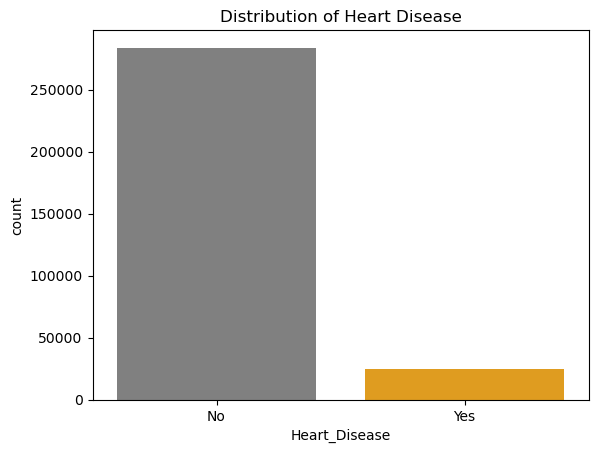

In [9]:
# Target variable analysis (Heart Disease):

color_map = {
    "Yes": "orange",
    "No": "grey"
}

sns.countplot(x='Heart_Disease', palette=color_map, data=df).set(title='Distribution of Heart Disease')

# 

- There is a significantly higher number of patients with no heart disease or myocardial infarction.

In [10]:
corr = df.corr()

corr

,Height_cm,Weight_kg,BMI,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Has_Exercise_Int,Has_Heart_Disease_Int,Has_Skin_Cancer_Int,Has_Other_Cancer_Int,Has_Depression_Int,Has_Diabetes_Int,Has_Arthritis_Int,Has_Smoking_History_Int,General_Health_Num,Checkup_Num,Age_Num
Height_cm,1.000000,0.472186,-0.027408,0.117766,-0.044960,-0.020923,0.068009,0.091618,0.015780,0.006812,-0.043459,-0.091318,-0.031477,-0.097789,0.051766,0.066942,-0.097467,-0.120895
Weight_kg,0.472186,1.000000,0.859699,-0.009985,-0.080893,-0.042976,0.067505,-0.090144,0.045875,-0.028954,-0.021132,0.047936,0.159184,0.074104,0.047538,-0.184238,0.009932,-0.062262
BMI,-0.027408,0.859699,1.000000,-0.078120,-0.066135,-0.037967,0.039860,-0.155756,0.042666,-0.037619,0.001047,0.109597,0.199758,0.137964,0.024854,-0.246499,0.062898,-0.007390
Alcohol_Consumption,0.117766,-0.009985,-0.078120,1.000000,-0.009807,0.028757,0.056914,0.121046,-0.061267,0.003857,-0.035146,-0.027845,-0.121968,-0.067122,0.042444,0.141136,-0.045869,-0.088022
Fruit_Consumption,-0.044960,-0.080893,-0.066135,-0.009807,1.000000,0.174595,-0.036231,0.110802,-0.015440,0.021384,0.007650,-0.029458,-0.015834,0.000193,-0.079745,0.086521,0.037383,0.038863
Green_Vegetables_Consumption,-0.020923,-0.042976,-0.037967,0.028757,0.174595,1.000000,0.009838,0.073942,-0.018684,0.001397,-0.005624,-0.027104,-0.013231,-0.013973,-0.021910,0.076299,0.024085,0.008862
FriedPotato_Consumption,0.068009,0.067505,0.039860,0.056914,-0.036231,0.009838,1.000000,0.003033,-0.020254,-0.027046,-0.027464,0.008597,-0.016071,-0.041504,0.002859,0.007022,-0.026218,-0.116973
Has_Exercise_Int,0.091618,-0.090144,-0.155756,0.121046,0.110802,0.073942,0.003033,1.000000,-0.096347,-0.003986,-0.054388,-0.084729,-0.138406,-0.124813,-0.093295,0.276096,-0.028492,-0.122345
Has_Heart_Disease_Int,0.015780,0.045875,0.042666,-0.061267,-0.015440,-0.018684,-0.020254,-0.096347,1.000000,0.090848,0.092387,0.032526,0.172204,0.153913,0.107797,-0.232503,0.085596,0.229011
Has_Skin_Cancer_Int,0.006812,-0.028954,-0.037619,0.003857,0.021384,0.001397,-0.027046,-0.003986,0.090848,1.000000,0.150824,-0.013014,0.034486,0.136178,0.032828,-0.047113,0.084594,0.272074


In [11]:
# We will calculate the correlation of numerical features with the target variable 'Has_Heart_Disease_Int'
correlation = df.corr()['Has_Heart_Disease_Int'].sort_values(ascending=False)

# Displaying the correlation coefficients
correlation_df = pd.DataFrame(correlation).reset_index()
correlation_df.columns = ['Feature', 'Correlation with Heart Disease']
correlation_df

,Feature,Correlation with Heart Disease
0,Has_Heart_Disease_Int,1.000000
1,Age_Num,0.229011
2,Has_Diabetes_Int,0.172204
3,Has_Arthritis_Int,0.153913
4,Has_Smoking_History_Int,0.107797
5,Has_Other_Cancer_Int,0.092387
6,Has_Skin_Cancer_Int,0.090848
7,Checkup_Num,0.085596
8,Weight_kg,0.045875
9,BMI,0.042666


# 

- Age, Diabetes, Arthritis, Smoking, other diseases, followed by body metrics show the highes relation with Heart Disease.

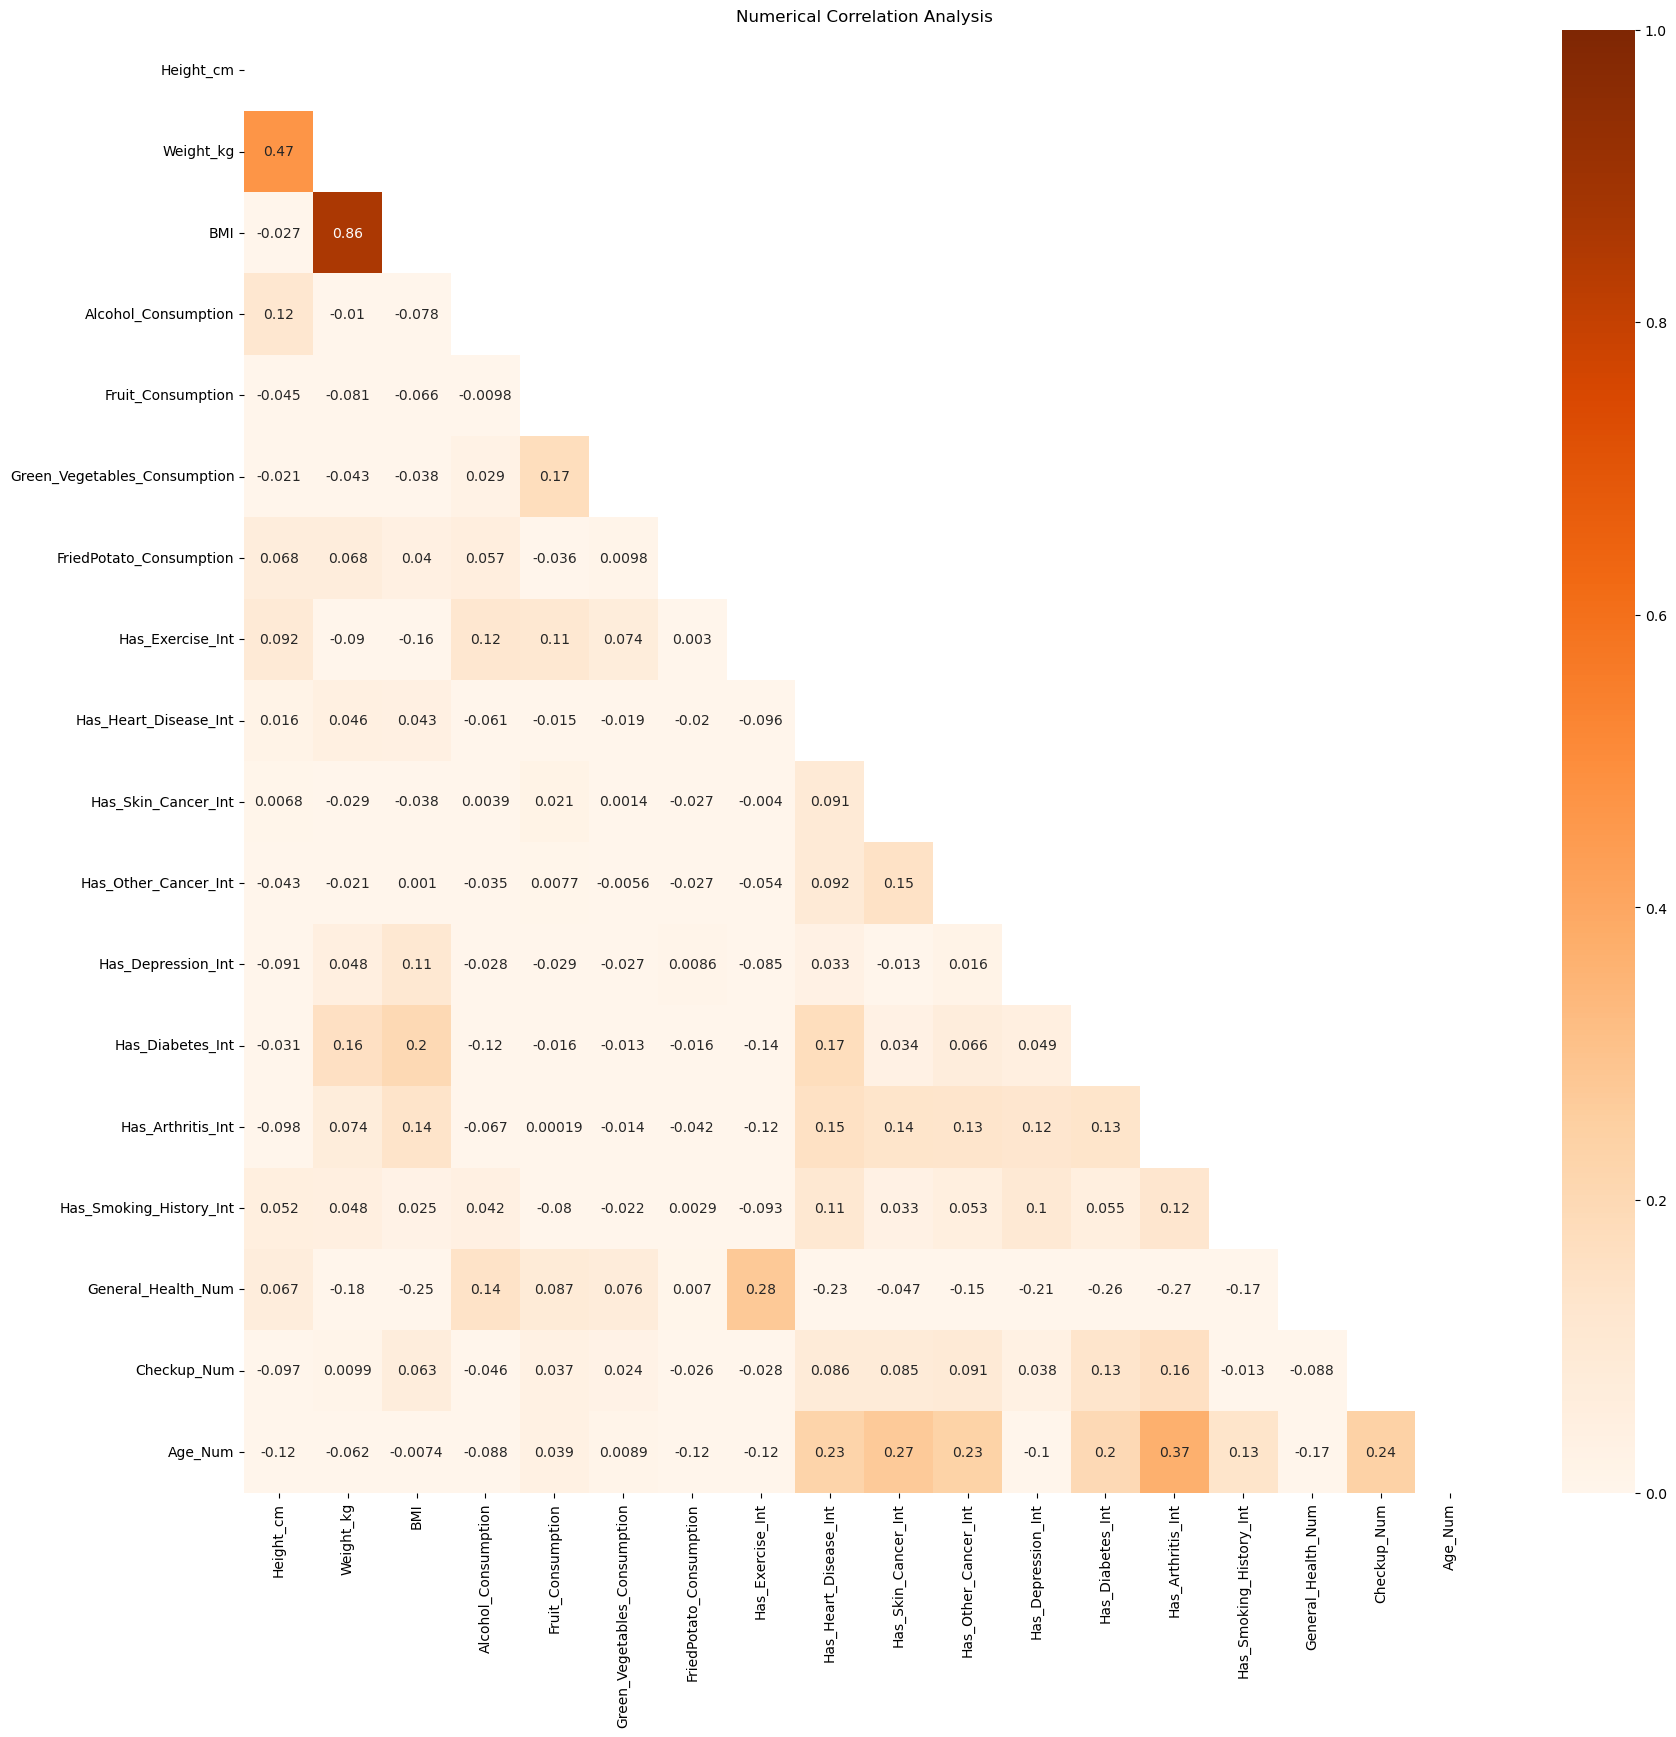

In [12]:
# Numerical Values Heatmap 

# Generate a mask for the upper triangle to avoid redundancy
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 19))
sns.heatmap(corr, mask=mask, cmap = 'Oranges', vmin=0, vmax=1, annot=True).set(title='Numerical Correlation Analysis')

plt.show()

# 

- There is a positive correlation between weight & BMI, in additon to a relationship between weight and height. This is expected, especially because BMI is a measure that takes weight & height into consideration.

- Most chronic diseases (CVD, Skin cancer, other cancer, diabetes, & arthritis) are positively correlated to age indicating that individuals are a higher risk of developing disease with age. Individuals tend to also continue smoking as they age.

- CVD seems to also be influenced by the prevalence of other diseases such as Diabetes and Arthritis.

- Checkup frequency also increases with age which can indicate the receival of treatment. 

- General Health shows more negative perceptions as individuals age. 

- Depression decreases with age suggesting that younger individuals are more prone to experiencing depression. 

- Exercise is positively correlated to general health indicating that exercise helps improve our health. 

- There is a positive correlation between Diabetes with BMI and Weight. 

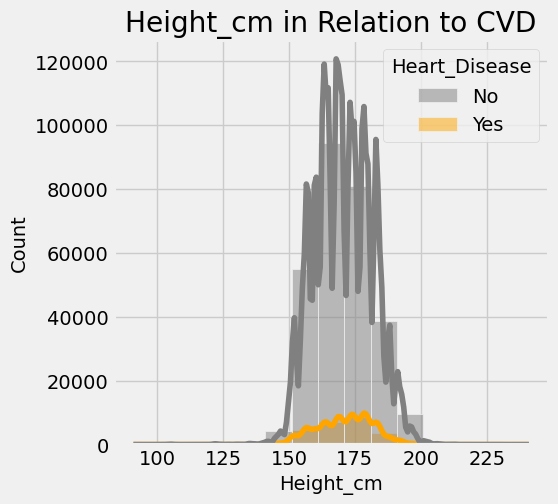

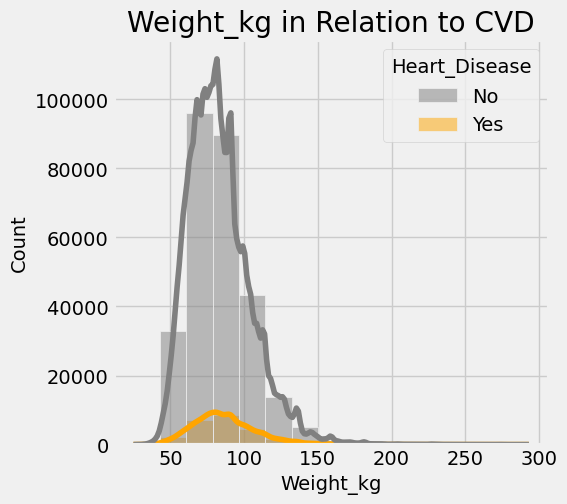

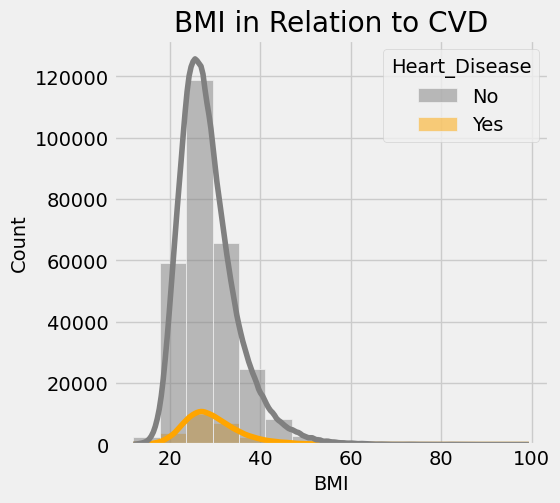

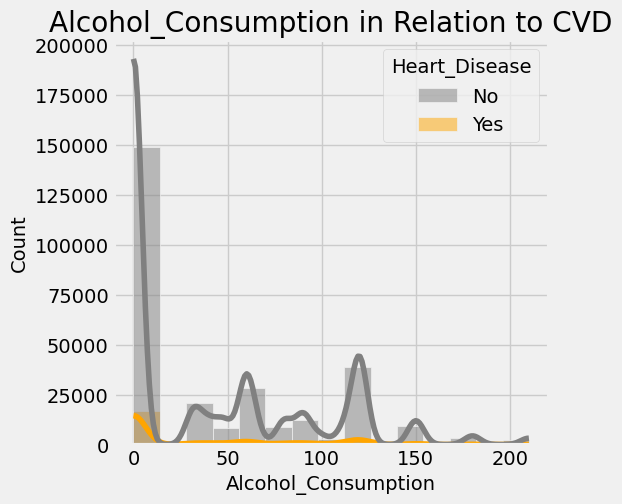

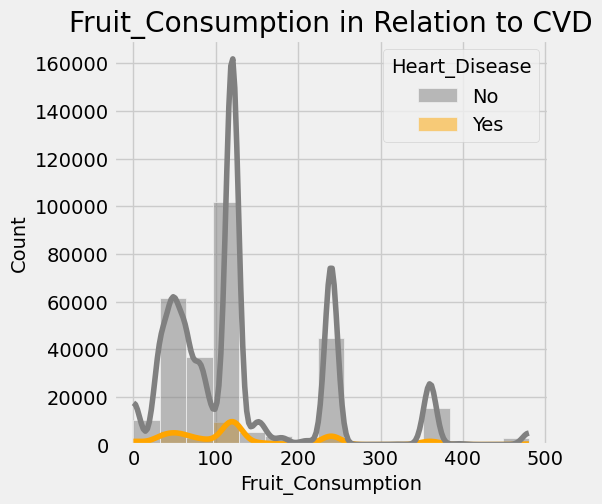

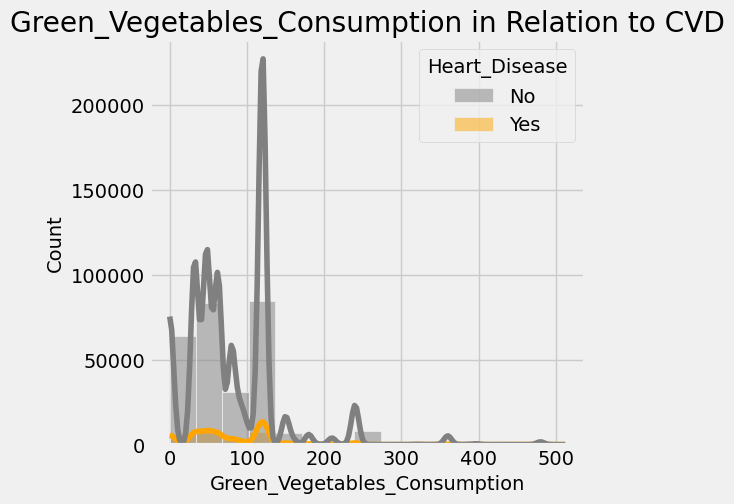

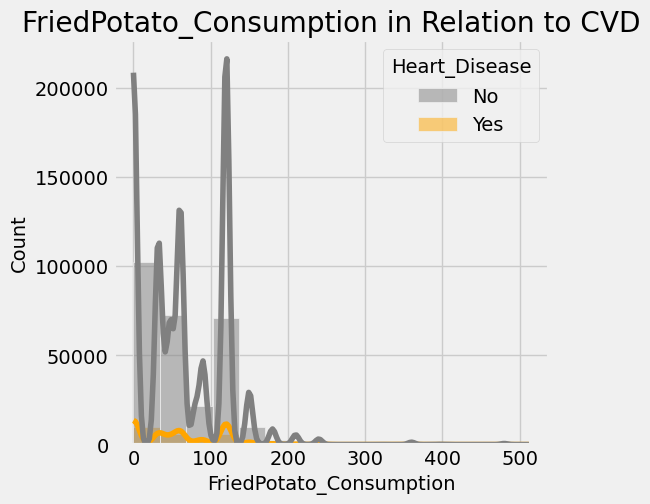

In [13]:
# Check the distribution of numerical variables

plt.style.use("fivethirtyeight")
numerical_variables = ['Height_cm', 'Weight_kg', 'BMI', 'Alcohol_Consumption', 
                       'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']

for variable in numerical_variables:
    plt.figure(figsize=(5, 5))
    sns.histplot(data=df, x=variable, 
                 hue='Heart_Disease', palette=color_map, kde=True, bins=15).set(title=variable + ' in Relation to CVD')                                                                                                    

## - Insights:

- Height:

Majority: 150-180 cm.

Higher heart disease: 165-180 cm.

No significant variance based on height.

-------------------------------------------------------------------------------------------------------------------------------

- Weight:

Majority: 50-100 kg.

Heart disease prevalent: 75-100 kg.

Weight doesn't drastically affect heart disease risk.

-------------------------------------------------------------------------------------------------------------------------------

- BMI:

Majority: 20-40.

Heart disease prevalent: 20-35.

Outliers present; no significant BMI-heart disease correlation.

-------------------------------------------------------------------------------------------------------------------------------

- Alcohol Consumption:

Distribution: Heavily right-skewed.

Majority: Low consumption.

High consumption slightly increases heart disease risk.

-------------------------------------------------------------------------------------------------------------------------------

- Fruit Consumption:
Majority: Regular consumption.

No clear fruit-heart disease correlation.

-------------------------------------------------------------------------------------------------------------------------------

- Green Vegetable Consumption:

Distribution: Right-skewed.

No direct vegetable-heart disease link.

-------------------------------------------------------------------------------------------------------------------------------

- Fried Potato Consumption:

Distribution: Right-skewed.

Majority: Low consumption.

Unclear fried potato-heart disease correlation.

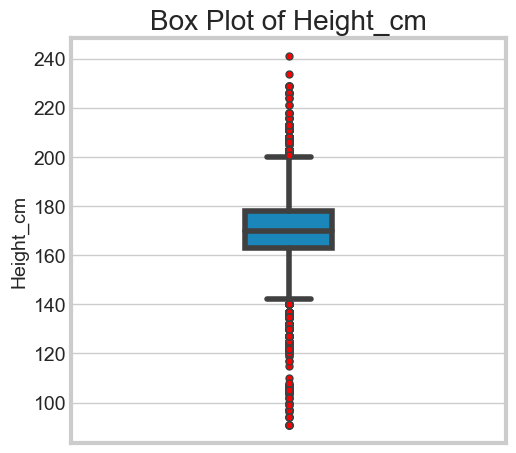

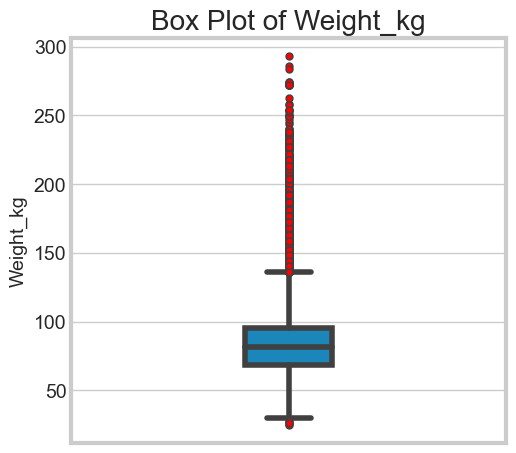

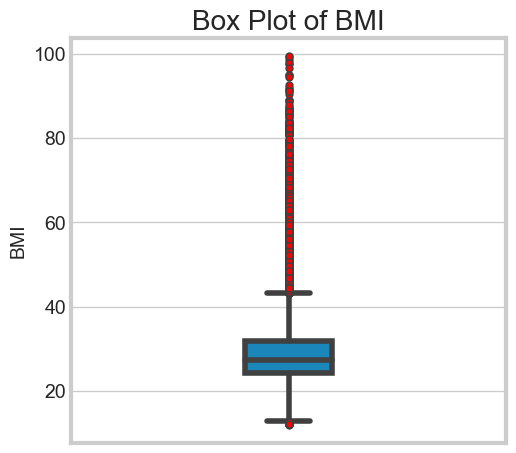

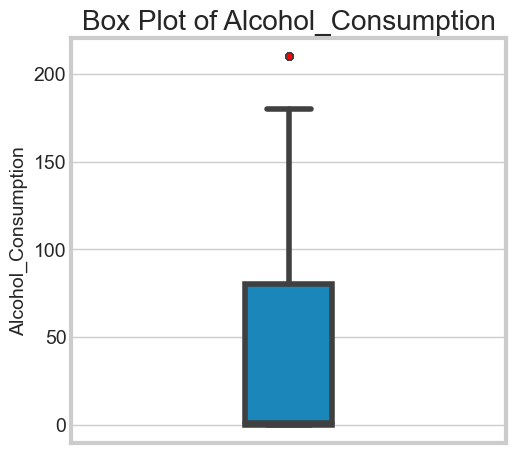

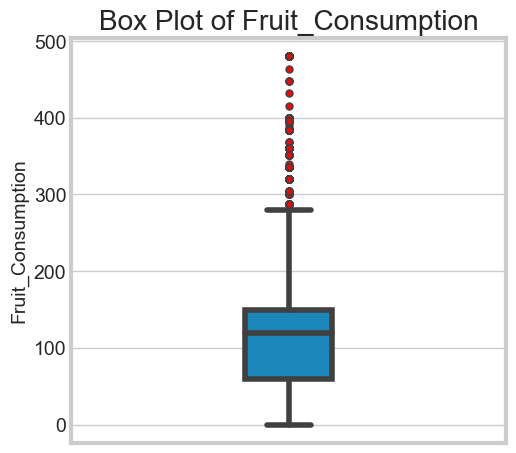

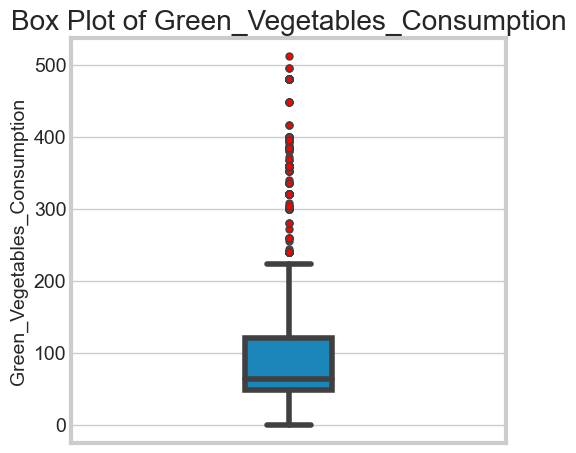

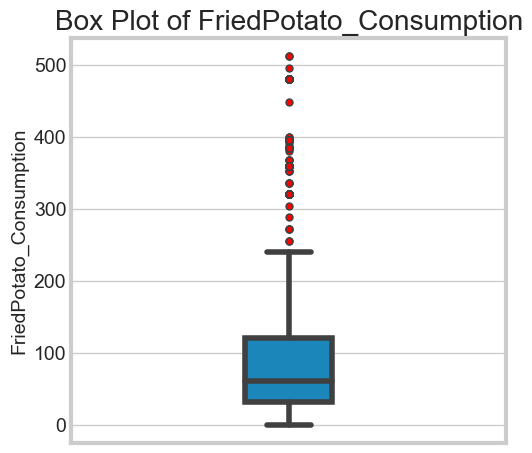

In [14]:
# Identify outliers or extreme cases: abnormally high or low values

sns.set_style("whitegrid")
for variable in numerical_variables:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=df[variable], width = 0.2, fliersize=5, flierprops={'marker':'o', 'markerfacecolor':'red'})
    plt.title(variable.replace('_', ' '))
    plt.title('Box Plot of ' + variable)  

# 

- Height:

The majority of the data is clustered around the middle, suggesting an average height range for most individuals.

There are outliers on both the lower and higher ends, representing particularly short and tall individuals, respectively. Most outliers range from approximately 90-140 cm & 200-240 cm.

-------------------------------------------------------------------------------------------------------------------------------

- Weight:

Outliers on the higher end represent individuals who weigh significantly more than the majority. Most outliers range from approximately 140-300 kg.

-------------------------------------------------------------------------------------------------------------------------------

- BMI:

There are numerous outliers on the higher end ranging from approximately 45-100.

-------------------------------------------------------------------------------------------------------------------------------

- Alcohol Consumption:

The main data cluster is towards the bottom, indicating that most individuals have a low alcohol consumption.

Numerous outliers are present, representing individuals with significantly higher alcohol intake.

-------------------------------------------------------------------------------------------------------------------------------

- Green Vegetable Consumption:

The majority of the data lies towards the lower end.

-------------------------------------------------------------------------------------------------------------------------------

- Fried Potato Consumption:

The majority of the data (the box) is close to the lower end, indicating that most people consume fried potatoes at a relatively lower quantity.

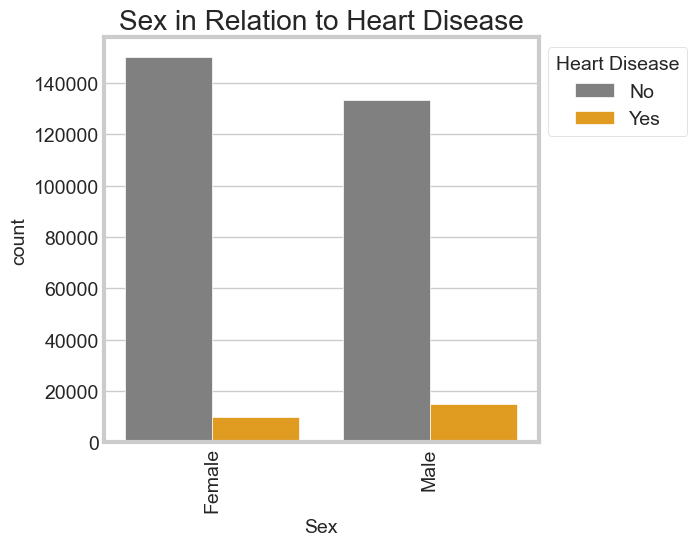

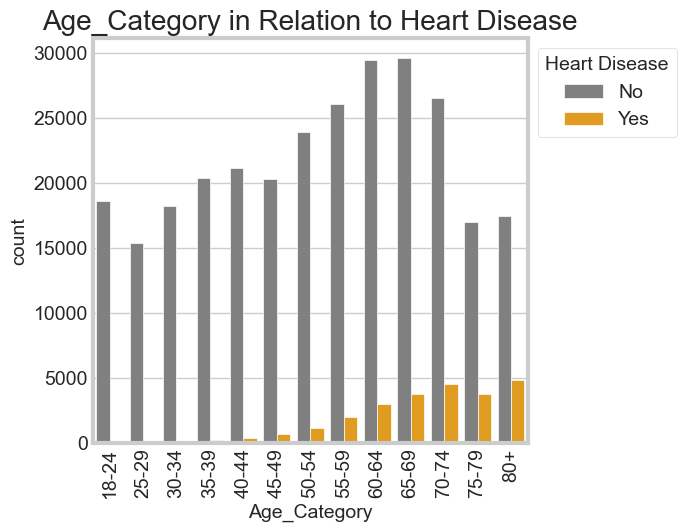

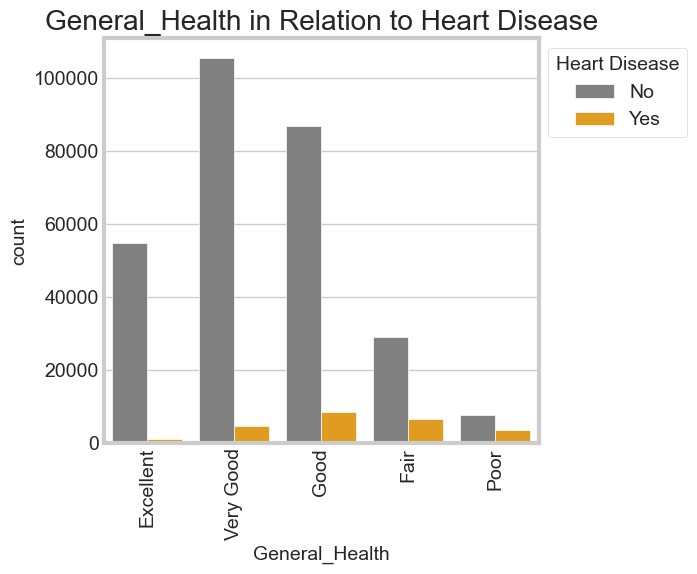

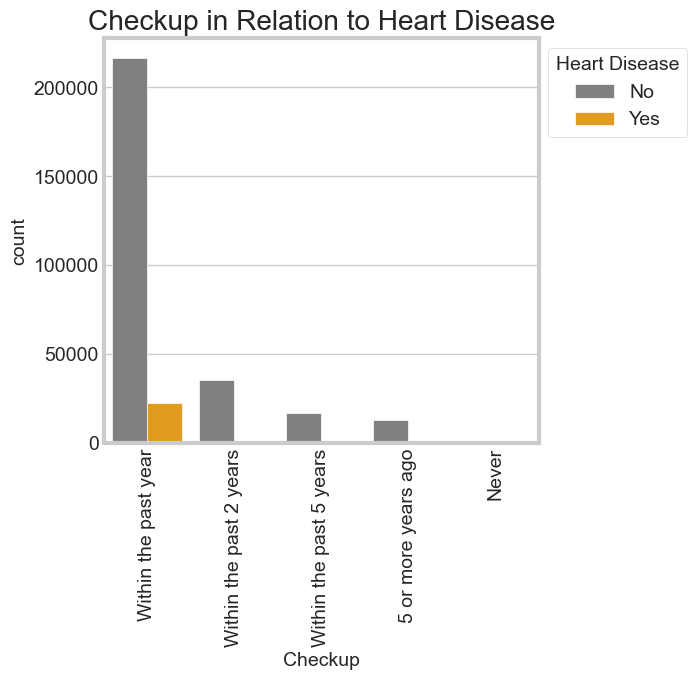

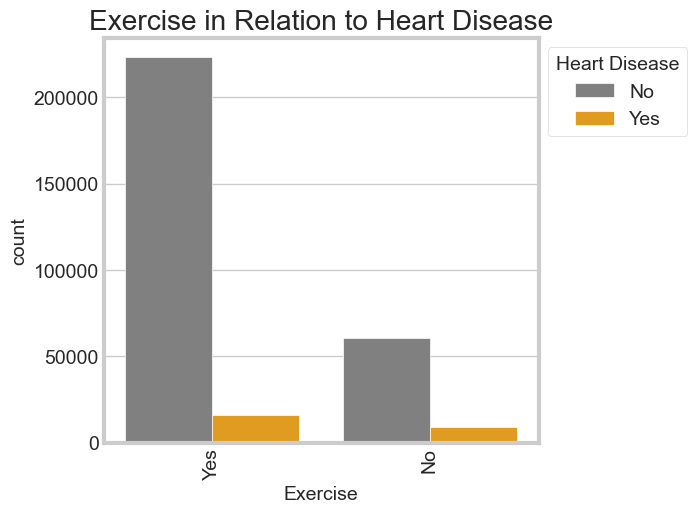

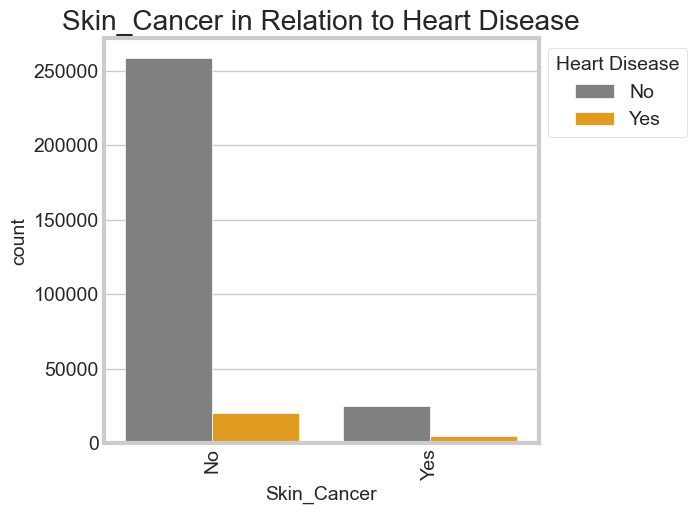

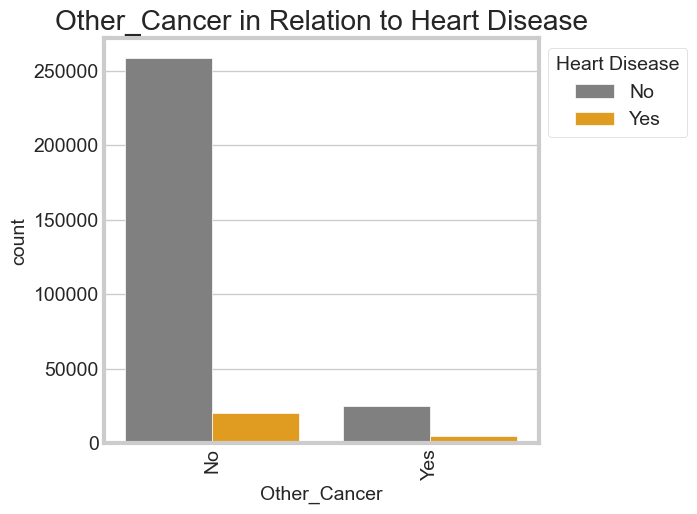

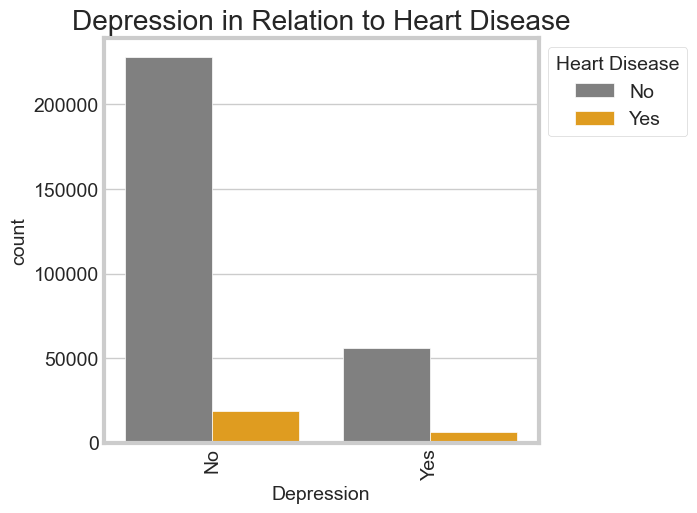

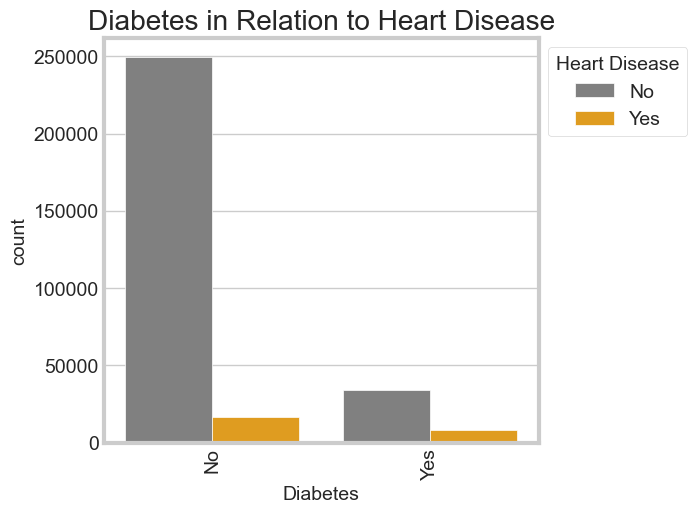

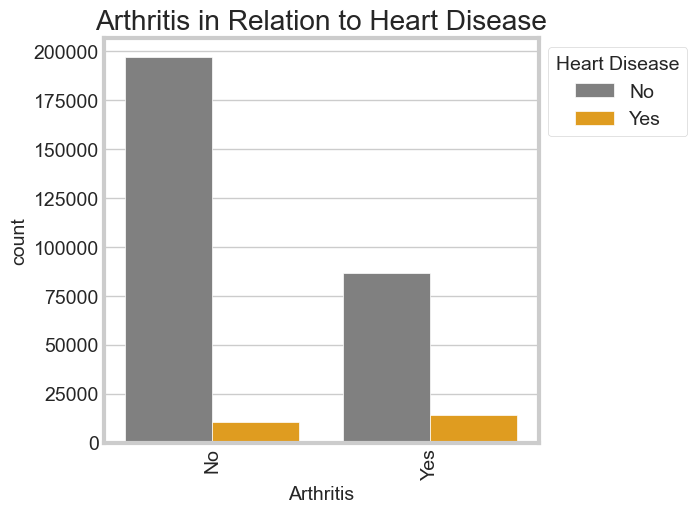

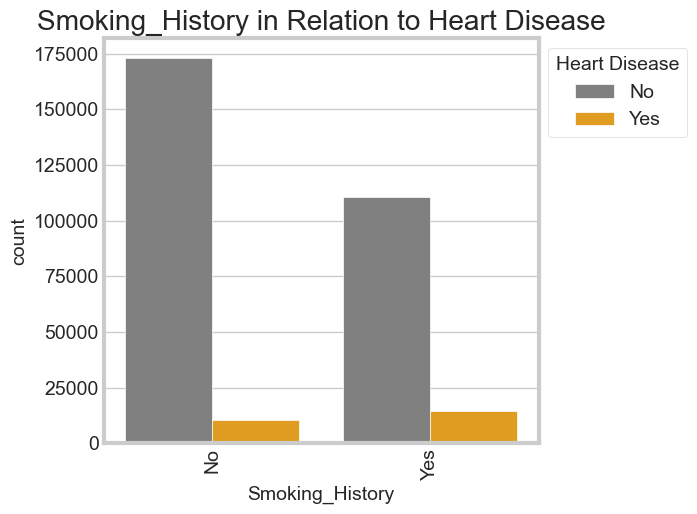

In [15]:
# Check the distribution of categorical variables and show how they relate to Heart disease, the target variable

categorical_variables = ['Sex', 'Age_Category', 'General_Health', 'Checkup', 
                         'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression',
                         'Diabetes', 'Arthritis', 'Smoking_History']

custom_order = {
    'Age_Category': ['18-24', '25-29', '30-34', '35-39', 
                     '40-44', '45-49', '50-54', '55-59', 
                     '60-64', '65-69', '70-74', '75-79', '80+'], 
    'General_Health': ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor'],
    'Checkup':['Within the past year', 'Within the past 2 years', 'Within the past 5 years', '5 or more years ago', 'Never']
}

for variable in categorical_variables:
    plt.figure(figsize=(5, 5))
    if variable in custom_order:
        order = custom_order[variable]
    else:
        order = df[variable].value_counts().index
    sns.countplot(data=df, x=variable, hue='Heart_Disease', palette=color_map, order=order)
    plt.title(variable.replace('_', ' ')) 
    plt.title(variable + ' in Relation to Heart Disease')
    plt.legend(title='Heart Disease', loc='upper left', bbox_to_anchor=(1, 1))
    plt.xticks(rotation=90)

# 

- Gender:
    
Both genders: Predominantly no heart disease.

Males: Slightly higher proportion with heart disease.

-------------------------------------------------------------------------------------------------------------------------------

- Age Category:
    
Younger age: Less heart disease.

Older age: Higher heart disease prevalence.

-------------------------------------------------------------------------------------------------------------------------------

- General Health:
    
Majority: "Very Good" or "Good".

Heart disease more prevalent in "Good" category.

Heart disease presence across all perceived health levels.

-------------------------------------------------------------------------------------------------------------------------------

- Checkup:
    
Majority: Checkup within the past year.

Heart disease presence in all checkup frequencies.

Regular checkups possibly aid in early detection/manage issues.

-------------------------------------------------------------------------------------------------------------------------------

- Exercise:
    
Majority: Engage in physical activity.

Exercise: Lower heart disease prevalence, but not an absolute safeguard.

-------------------------------------------------------------------------------------------------------------------------------

- Skin Cancer, Other Cancer, Depression, & Diabetes:
    
Majority: No conditions and no heart disease.

-------------------------------------------------------------------------------------------------------------------------------

- Arthritis:
    
Most: No arthritis.

Higher heart disease prevalence in arthritis patient as also observed in the correlation heatmap.

-------------------------------------------------------------------------------------------------------------------------------

- Smoking History:
    
Majority: No smoking history.

More smoking: Higher heart disease prevalence.

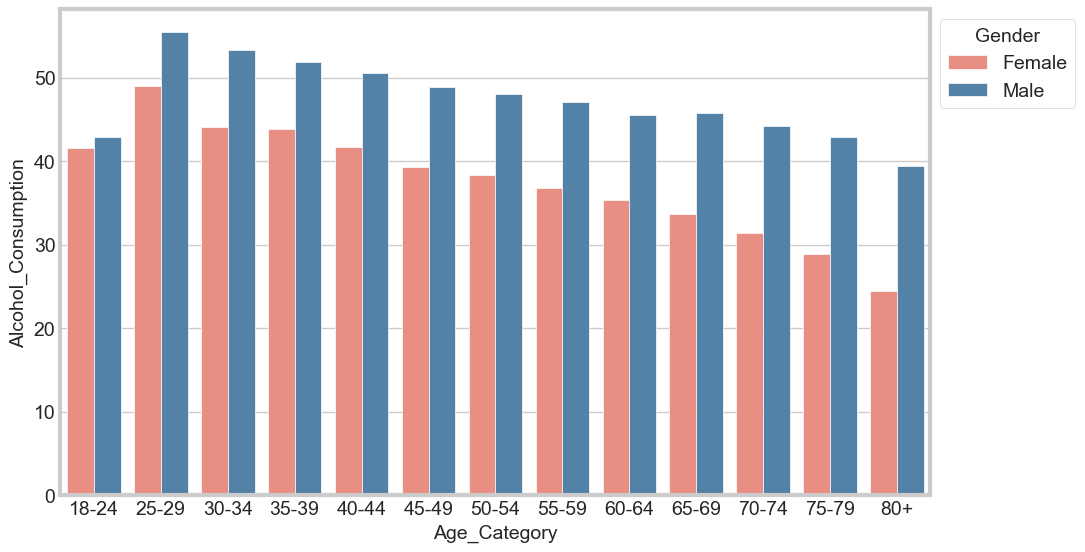

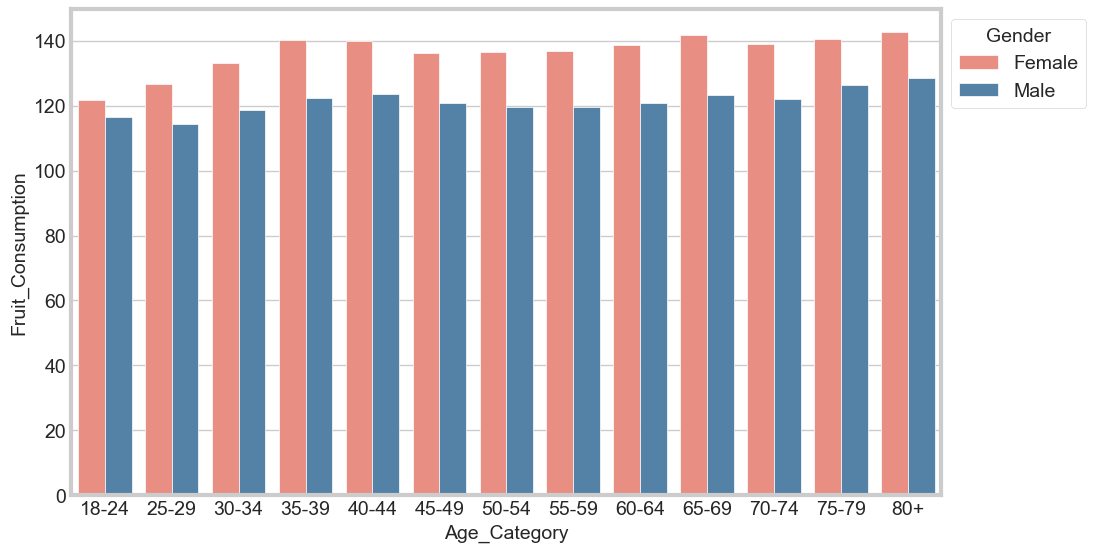

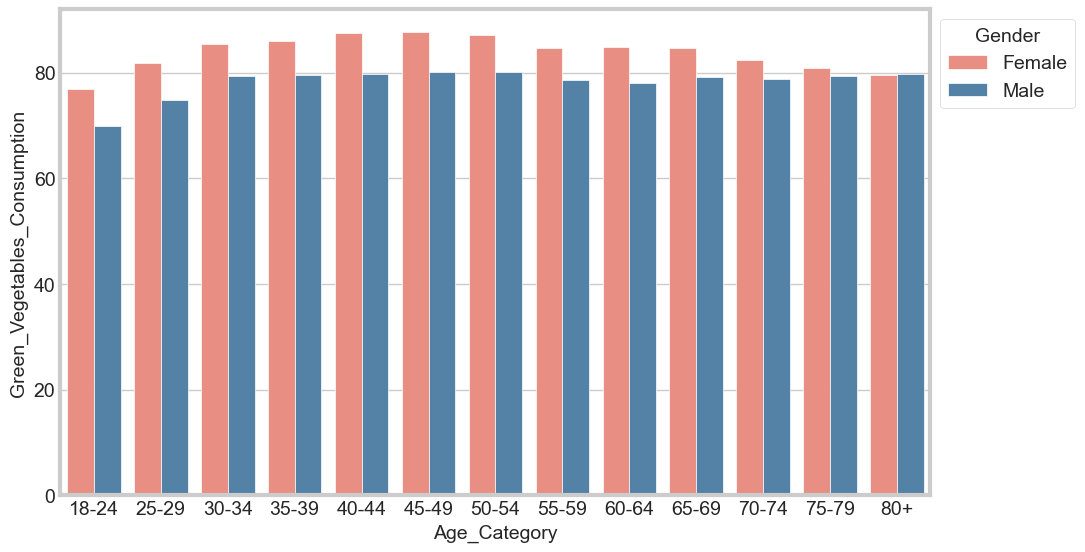

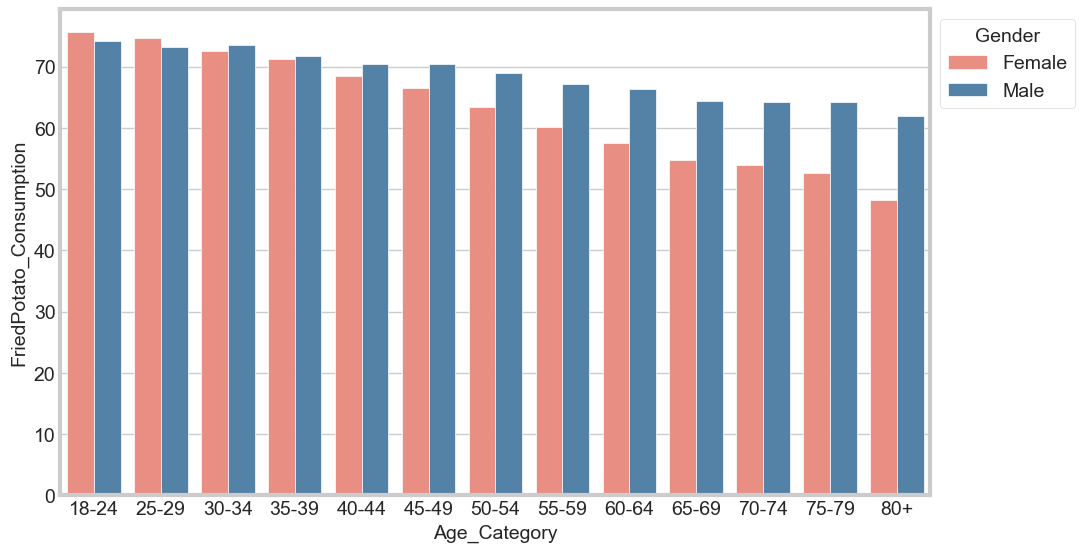

In [65]:
# Dietary Consumptions in Different Age groups & Gender:

dietary_consumptions = ['Alcohol_Consumption', 'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']
   
colors = {
    'Male': 'steelblue',
    'Female': 'salmon'
}

age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

for variable in dietary_consumptions:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, y=variable, x='Age_Category', order=age_order, hue='Sex', palette=colors,ci=None)
    plt.legend(title='Gender', loc='upper left', bbox_to_anchor=(1, 1))

# 

- Alcohol Consumption:

Males: Higher consumption across all ages.

18-24 age group: Males much higher than females.

Females (18-24): Comparatively low consumption.

-------------------------------------------------------------------------------------------------------------------------------

- Fruit Consumption:

High for both genders across ages.

18-24 age group: Females slightly higher than males.

-------------------------------------------------------------------------------------------------------------------------------

- Green Vegetable Consumption:
High for both genders across ages.

18-24 age group: Males notably lower than females.

-------------------------------------------------------------------------------------------------------------------------------

- Fried Potato Consumption:
High for both genders across ages.

Males: Slightly higher than females in most ages.

-------------------------------------------------------------------------------------------------------------------------------

- Bad Eating Habits (Alcohol & Fried Potatoes):

Males: Generally higher bad habits, especially alcohol (18-24).

- Good Eating Habits (Green Veggies & Fruits):

Both genders: High consumption across ages.

## Statistical Analysis through Statistical Significance:

This is useful for a number of reasons:

- Validity: 

Checking for statistical significance helps validate the observations from the data. Instead of relying on just visual or intuitive differences between groups, statistical tests give a measure of how likely these differences are due to actual associations versus occurring by chance.

- Decision Making:

P-values and statistical tests assist in decision-making. For instance, if gender significantly influences heart disease prevalence, it could be crucial for health campaigns, policy-making, and clinical decisions.

- Refining Focus: 

By understanding which variables are statistically significant, researchers can refine their focus, making subsequent analyses or experiments more targeted and efficient.

## Chi-Square Test:

this test involves checking if there's a significant association between two categorical variables.

## Are Age, General Health, Exercise Habits, Smoking History, and Gender Statistically Associated with the Prevalence of Heart Disease?

In [17]:
chosen_variables = ['Age_Category', 'General_Health', 'Exercise', 'Smoking_History', 'Sex']

for var in chosen_variables:
    # Creating a contingency table for each variable
    contingency = pd.crosstab(df[var], df['Heart_Disease'])
    
    # Performing the chi-square test
    chi2, p, _, _ = stats.chi2_contingency(contingency)

    print(f"{var}:\n")
    # A large value indicates that the two categorical variables are not independent and are related in some way.
    # A small value suggests that any differences could be due to random chance alone, indicating that the variables might be independent
    print("Chi2 Value = ", chi2)
    print("P-Value = ", p)

    if p < 0.05:
        print(f"The association between {var} and Heart Disease is statistically significant.\n")
    else:
        print(f"There's no statistically significant association between {var} and Heart Disease.\n")

Age_Category:

Chi2 Value =  18035.930858650143
P-Value =  0.0
The association between Age_Category and Heart Disease is statistically significant.

General_Health:

Chi2 Value =  19234.33413703971
P-Value =  0.0
The association between General_Health and Heart Disease is statistically significant.

Exercise:

Chi2 Value =  2866.154497542652
P-Value =  0.0
The association between Exercise and Heart Disease is statistically significant.

Smoking_History:

Chi2 Value =  3588.1356452730433
P-Value =  0.0
The association between Smoking_History and Heart Disease is statistically significant.

Sex:

Chi2 Value =  1627.1191844519758
P-Value =  0.0
The association between Sex and Heart Disease is statistically significant.



#

- Age_Category: 

Age is significantly associated with the prevalence of heart disease. This is not surprising given that age is a well-known risk factor for many heart conditions.

-------------------------------------------------------------------------------------------------------------------------------

- General_Health:

The way individuals rate their general health has a significant association with the prevalence of heart disease. Those who rate their health poorly might be more likely to have or develop heart disease.

-------------------------------------------------------------------------------------------------------------------------------

- Exercise: 

The exercise habits of individuals are significantly related to heart disease prevalence. Regular exercise is known to have cardiovascular benefits, so it's logical that there would be an association.

-------------------------------------------------------------------------------------------------------------------------------

- Smoking_History: 

Smoking is significantly associated with heart disease. This too is expected since smoking is a prominent risk factor for heart diseases.

-------------------------------------------------------------------------------------------------------------------------------

- Sex:

Gender has a significant association with heart disease prevalence. The difference could be due to biological reasons, lifestyle differences, or even healthcare access and utilization differences between the sexes

## ANOVA (Analysis of Variance) Test:

a statistical method used to test the differences between two or more means. It evaluates whether the means of several groups are equal, which is essentially testing the hypothesis that the groups don't have any significant difference in terms of their means.

## How Might Age, General Health, and Frequency of Checkups Contribute Indirectly to Heart Disease Risk Through Their Influence on BMI?

In [18]:
# An ANOVA Test for my dataset would be most useful for features with more than 2 categories
# For my dataset, this would apply to: General Health, Checkup, & Age_Category

group_variables = ['Age_Category', 'General_Health', 'Checkup']

for var in group_variables:
    # Group data by BMI
    grouped_data = [df['BMI'][df[var] == value].values for value in df[var].unique()]

    # Perform ANOVA
    f_stat, p_val = stats.f_oneway(*grouped_data)

    print(f"{var}:\n")
    # large F-statistic will indicate that that at least one group mean is different from the others
    # Small F-statistic will indicate that the group means aren't that different when considering the variability within each group
    print("F-statistic = ", f_stat)
    print("P-Value = ", p_val)

    if p_val < 0.05:
        print(f"There is a significant difference in the means of BMI occurrence for different {var} categories.\n")
    else:
        print(f"There is no significant difference in the means of BMI occurrence for different {var} categories.\n")

Age_Category:

F-statistic =  756.8109676458419
P-Value =  0.0
There is a significant difference in the means of BMI occurrence for different Age_Category categories.

General_Health:

F-statistic =  5319.901264061136
P-Value =  0.0
There is a significant difference in the means of BMI occurrence for different General_Health categories.

Checkup:

F-statistic =  351.049884669933
P-Value =  4.150150973824421e-302
There is a significant difference in the means of BMI occurrence for different Checkup categories.



# 

- Age_Category: 

There is a significant difference in the means of BMI across different age categories. This implies that as age changes, there is a discernible shift in BMI values among the groups.

-------------------------------------------------------------------------------------------------------------------------------

- General_Health: 

The average BMI varies significantly across the different general health categories. This suggests that there's a connection between how someone rates their general health and their BMI.

-------------------------------------------------------------------------------------------------------------------------------

- Checkup: 

There's a significant variation in the average BMI values among the different categories for when a person last had a checkup. The reasons behind this can be different – it could be because regular check-ups might prompt more health-conscious behavior or because certain health outcomes (which might also be linked with BMI) lead individuals to get more frequent checkups.

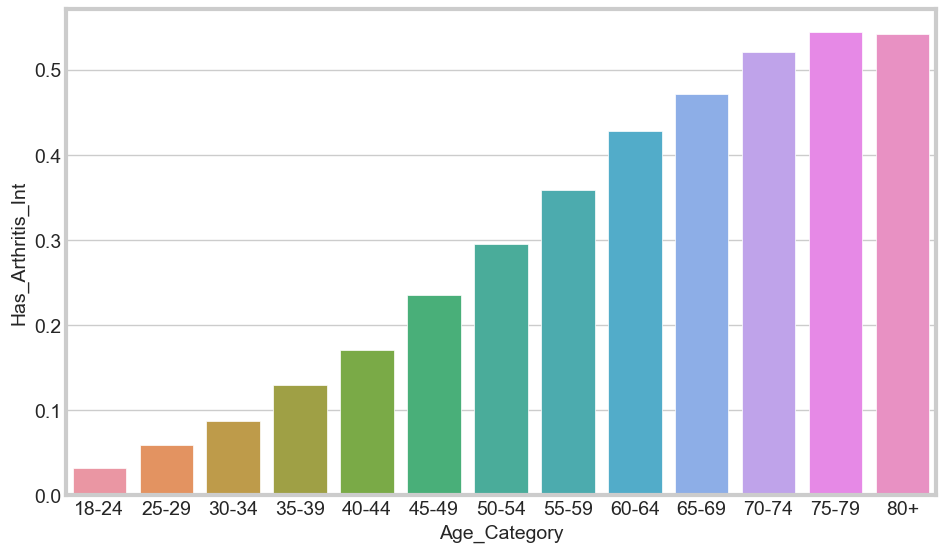

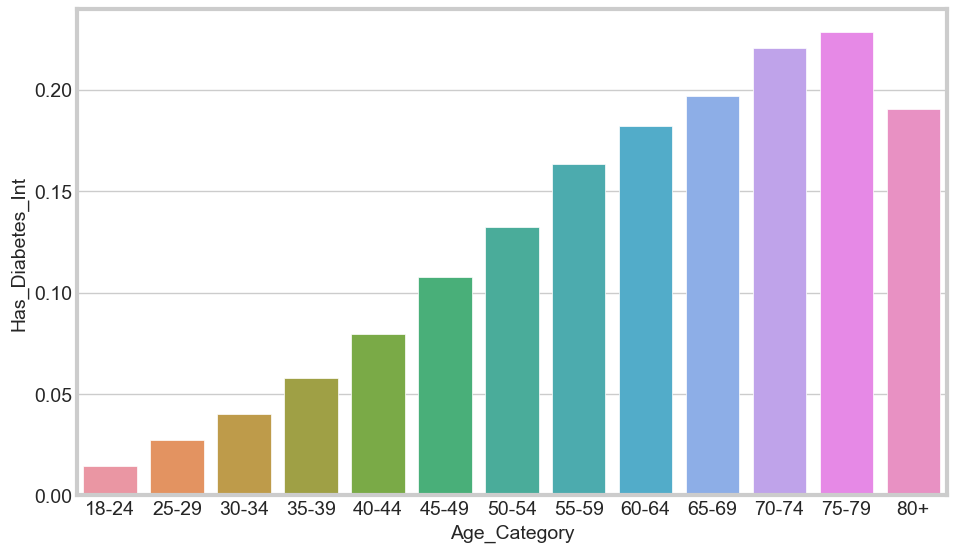

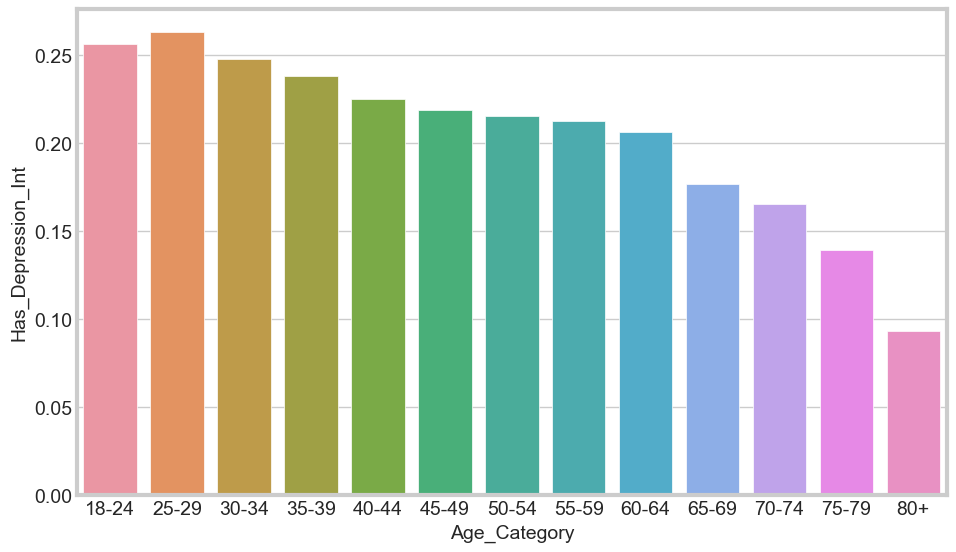

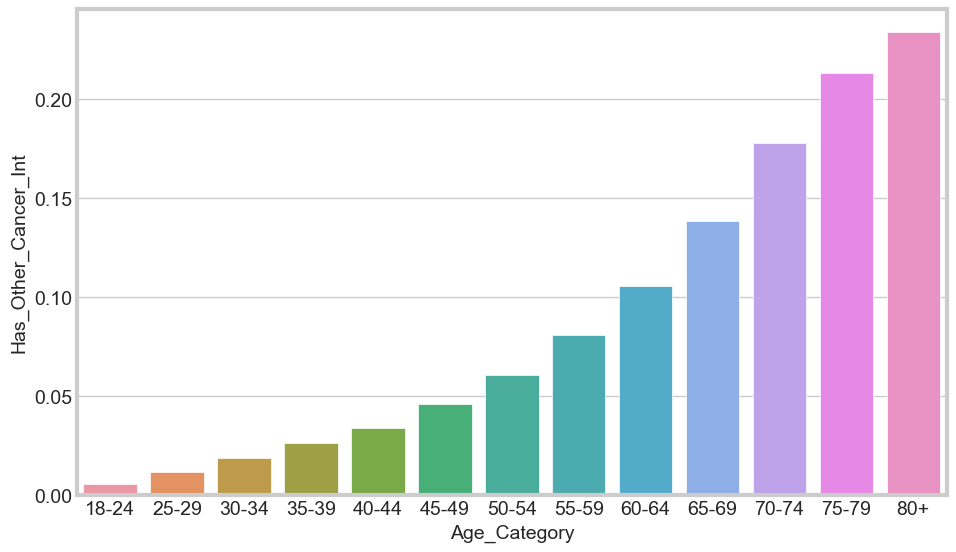

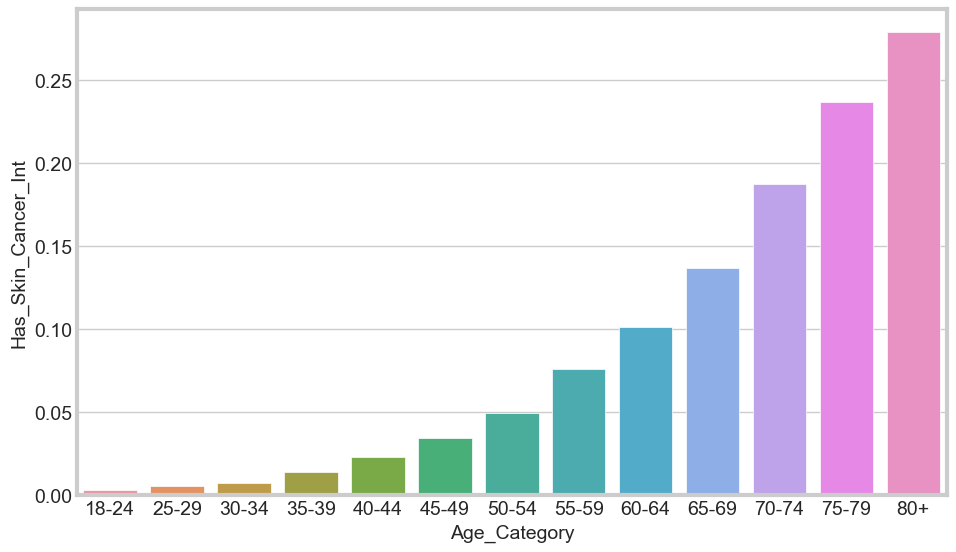

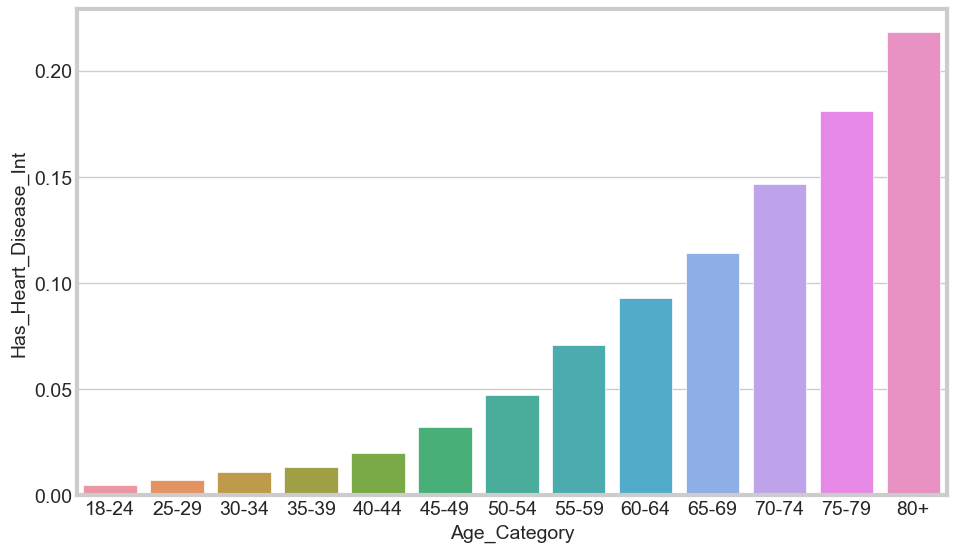

In [63]:
# Chronic Diseases in relation to Age: 

diseases = ['Has_Arthritis_Int', 'Has_Diabetes_Int', 'Has_Depression_Int', 'Has_Other_Cancer_Int',
                        'Has_Skin_Cancer_Int', 'Has_Heart_Disease_Int']


age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

for variable in diseases:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, y=variable, x='Age_Category', order=age_order,ci=None)

# 

- Most chronic diseases rates, including CVD, increase as we age with the exception of depression as also observed in the heatmap above. This suggests that individuals should take more care of their health as they age. 

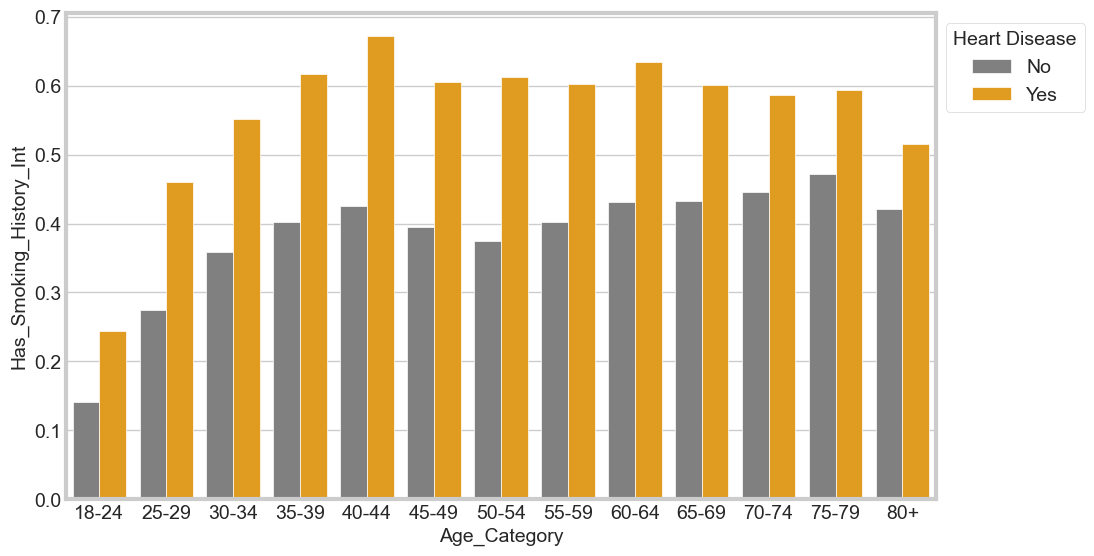

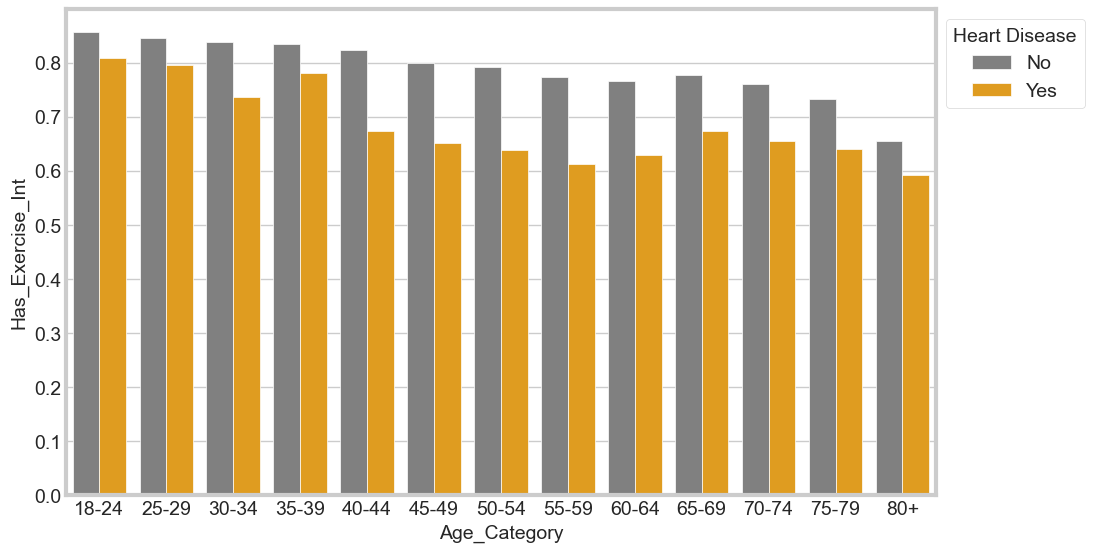

In [60]:
# Smoking & Exercise in relation to Age: 

other_factors = ['Has_Smoking_History_Int', 'Has_Exercise_Int']

color_map = {
    "Yes": "orange",
    "No": "grey"
}

age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']

for variable in other_factors:
    plt.figure(figsize=(10, 6))
    sns.barplot(data=df, y=variable, x='Age_Category', order=age_order, hue='Heart_Disease', palette=color_map, ci=None)
    plt.legend(title='Heart Disease', loc='upper left', bbox_to_anchor=(1, 1))

# 

- Individuals tend to exercise less as they age. Smoking, however shows consistent patterns with it mostly increasing with age which can intensify health challenges.

- Individual who smoke more and exercise less are at a higher risk of heart disease across all age groups.

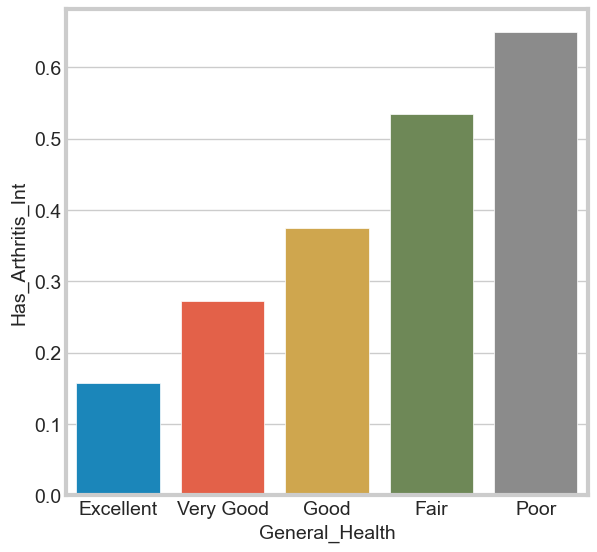

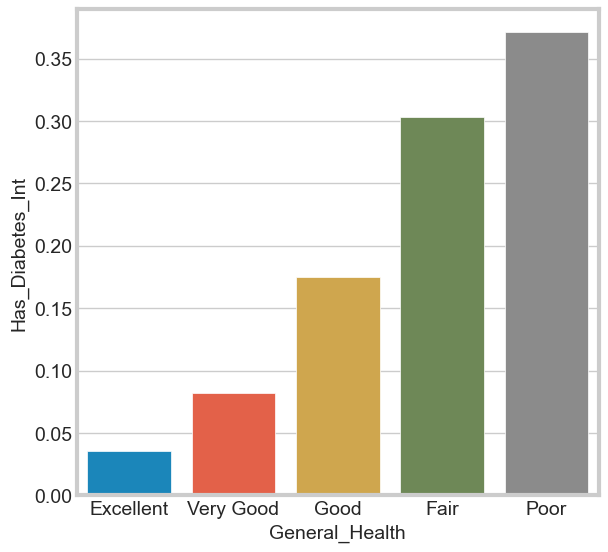

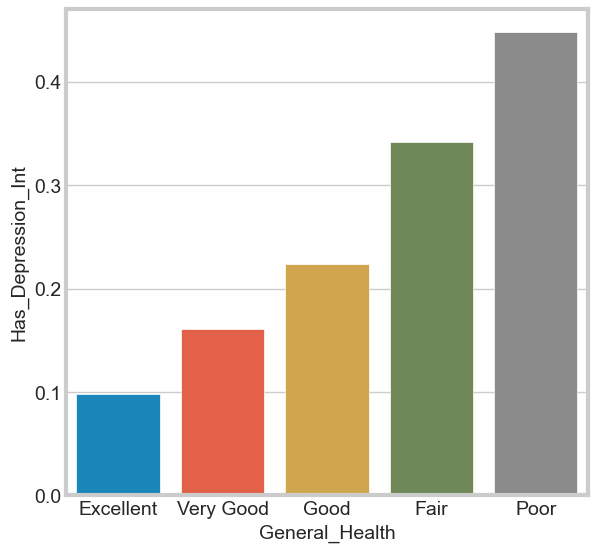

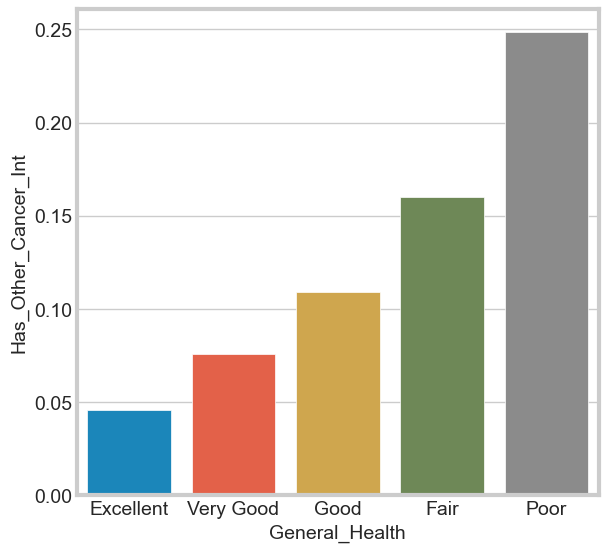

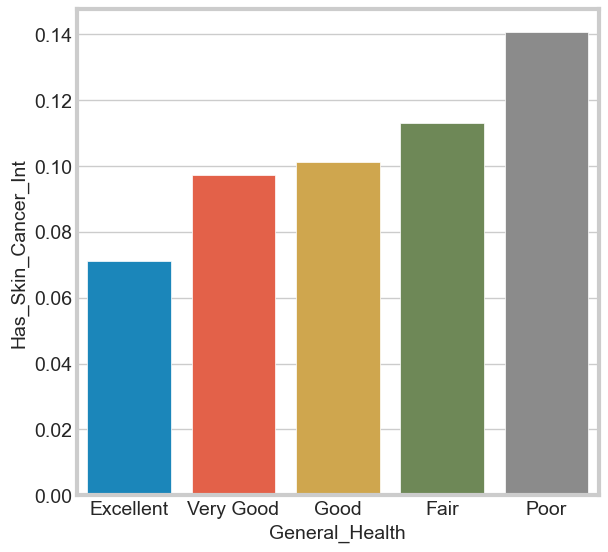

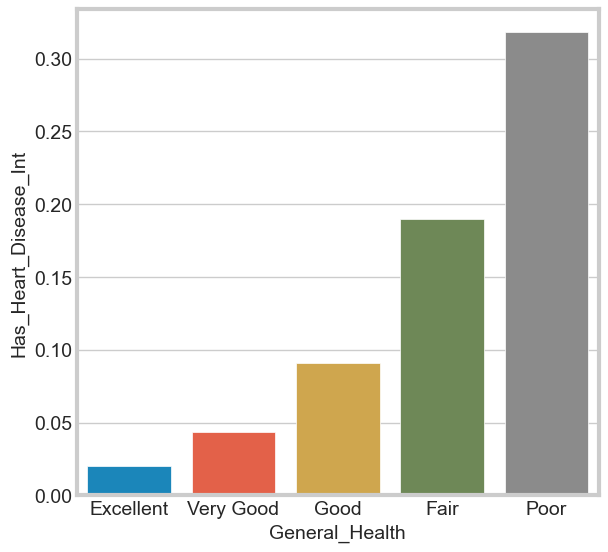

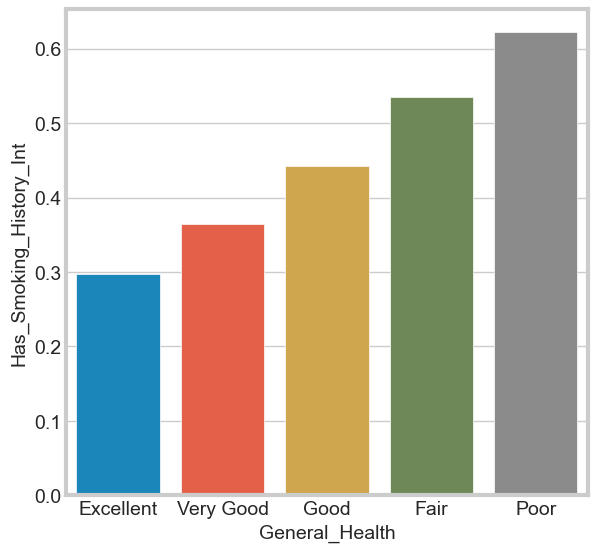

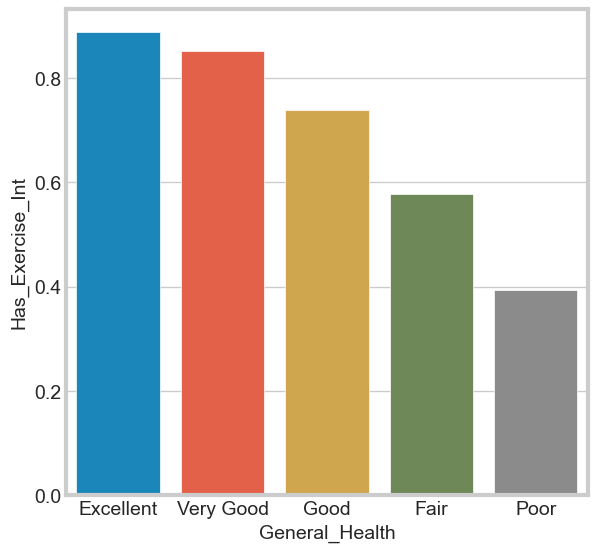

In [61]:
# How does general health perceptions relate to disease prevalence and other factors such as smoking and exercise?: 

factors = ['Has_Arthritis_Int', 'Has_Diabetes_Int', 'Has_Depression_Int', 'Has_Other_Cancer_Int',
                        'Has_Skin_Cancer_Int', 'Has_Heart_Disease_Int', 'Has_Smoking_History_Int', 'Has_Exercise_Int']


health_order = ['Excellent', 'Very Good', 'Good', 'Fair', 'Poor']

for variable in factors:
    plt.figure(figsize=(6, 6))
    sns.barplot(data=df, y=variable, x='General_Health', order=health_order,ci=None)

# 

- Positive health perceptions tend to decrease as disease rates increase as also observed with increasing smoking rates.

- Individuals who exercise less positive health perceptions indicating that exercise improves health. 

In [22]:
# Recode and create a new column for BMI breaking them into levels: Underweight, Normal Weight, Overweight, and Obesity.

# Define conditions and corresponding categories
conditions = [
    (df['BMI'] < 18.5),
    (df['BMI'] >= 18.5) & (df['BMI'] <= 24.9),
    (df['BMI'] >= 25) & (df['BMI'] <= 29.9),
    (df['BMI'] >= 30)
]

categories = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Create a new column 'BMI_Category' based on conditions
df['BMI_Category'] = pd.Series(np.select(conditions, categories, default=''), dtype='category')

# Display the updated DataFrame
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Has_Skin_Cancer_Int,Has_Other_Cancer_Int,Has_Depression_Int,Has_Diabetes_Int,Has_Arthritis_Int,Has_Smoking_History_Int,General_Health_Num,Checkup_Num,Age_Num,BMI_Category
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,...,0,0,0,0,1,1,1,4,11,Underweight
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,...,0,0,0,1,0,0,4,5,11,Overweight
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,...,0,0,0,1,0,0,4,5,9,Obese
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,...,0,0,0,1,0,0,1,5,12,Overweight
4,Good,Within the past year,No,No,No,No,No,No,No,Male,...,0,0,0,0,0,1,3,5,13,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,...,0,0,0,0,0,0,4,5,2,Overweight
308850,Fair,Within the past 5 years,Yes,No,No,No,No,Yes,No,Male,...,0,0,0,1,0,0,2,3,10,Normal
308851,Very Good,5 or more years ago,Yes,No,No,No,Yes,Yes,No,Female,...,0,0,1,1,0,1,4,2,3,Normal
308852,Very Good,Within the past year,Yes,No,No,No,No,No,No,Male,...,0,0,0,0,0,0,4,5,10,Normal


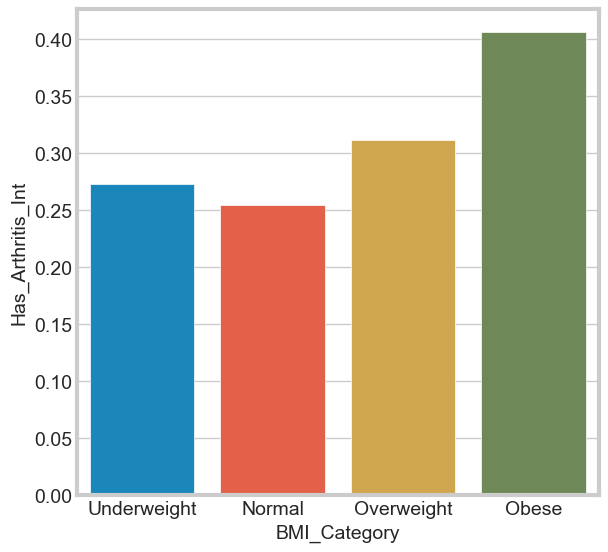

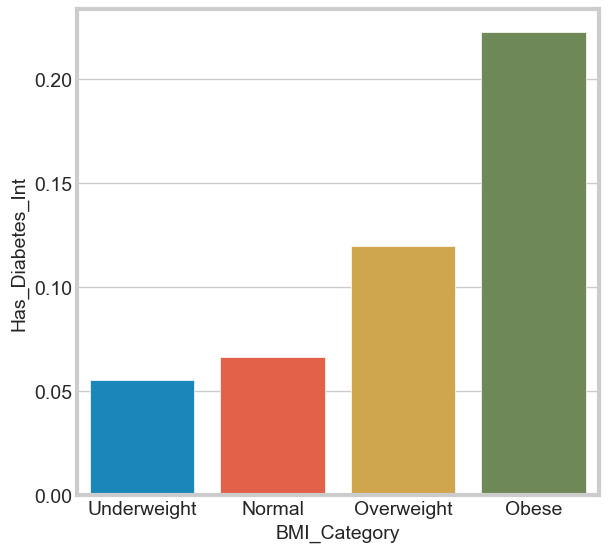

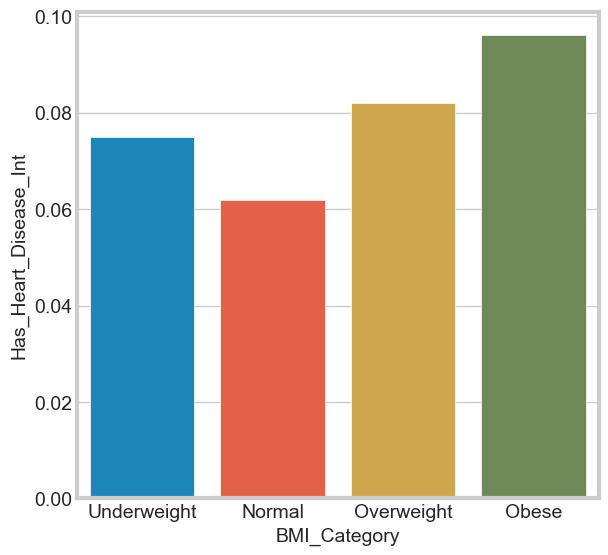

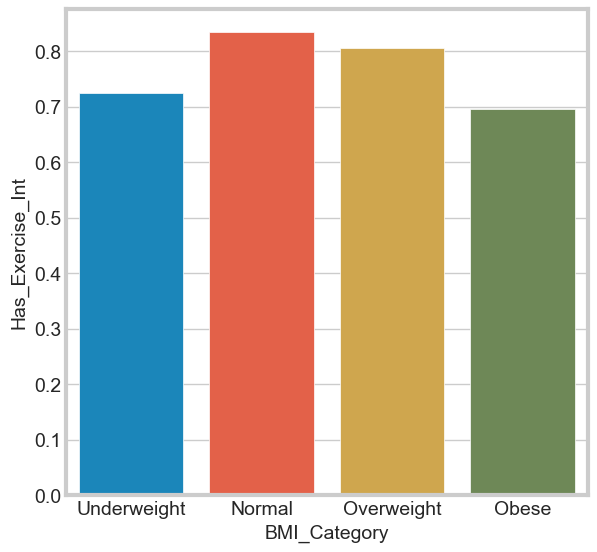

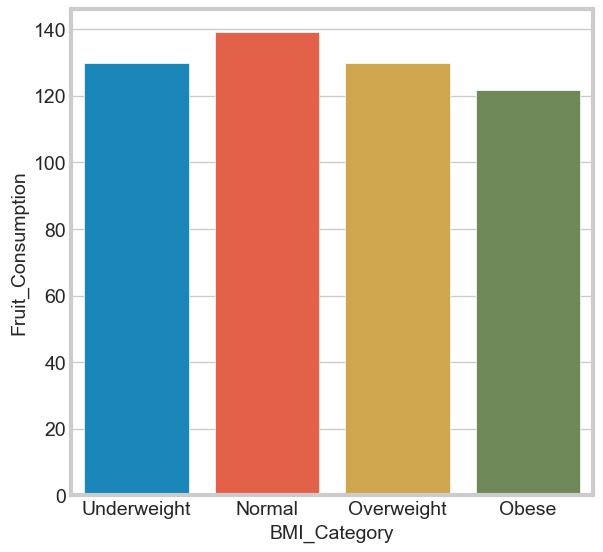

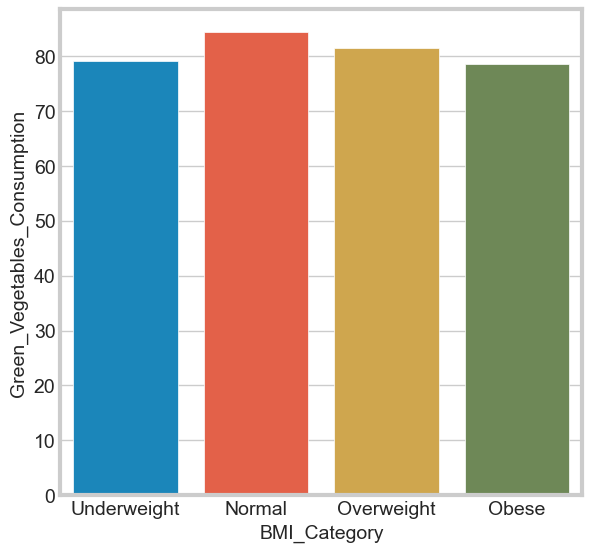

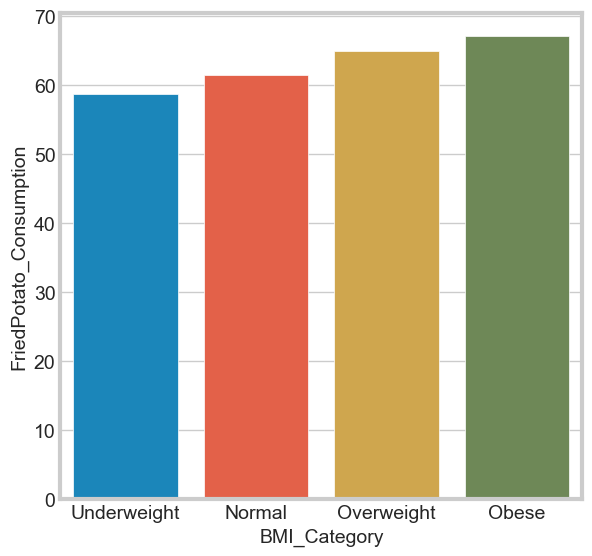

In [66]:
# How does BMI interact with different diseases and other factors: 

factors = ['Has_Arthritis_Int', 'Has_Diabetes_Int', 'Has_Heart_Disease_Int', 'Has_Exercise_Int',
           'Fruit_Consumption', 'Green_Vegetables_Consumption', 'FriedPotato_Consumption']


BMI_order = ['Underweight', 'Normal', 'Overweight', 'Obese']

for variable in factors:
    plt.figure(figsize=(6, 6))
    sns.barplot(data=df, y=variable, x='BMI_Category', order=BMI_order,ci=None)

# 

- Obese individuals are more likely to develop diseases such as CVD, Diabetes, & Arthritis suggesting the importance of maintaining weight. 

- It seems like exercising more helps individuals maintain a healthy normal BMI. 

- Individuals within the normal BMI category seem to consume more fruits and green vegetables. However, there is a relation showing that consuming more fried potato places indivudals at a higher risk of obesity, which can lead to diabetes, and thus heart disease or other heart-related issues. 

## - Dataset 2 sourced from the University of California at Irvine (UCI) and extracted from:

The UCI's machine learning repository (Cleveland's Database). This dataset was donted to UCI in 1988. This dataset complements the BRFSS data and includes medical terminology and factors that are known to influence CVD such as bloos pressure, cholestrol, chest pain, max heart rate, sugar level, artery blockage, etc.

## - Before performing the below analyses, I modified the features names to terms that are easier and more clear for the general public to grasp using R programming.

In [24]:
# Import dataset:

df2 = pd.read_csv(r"C:\Users\Aya K\Desktop\FA'23\ERM 412\Cleveland CVD Data.csv")

# Display first few rows of dataset:

df2

,Age,Sex,ChestPain_Type,Blood_Pressure_Level,Cholestrol_Level,Sugar_Level,Electrocardiogram_Results,Max_Heart_Rate,Exercise_Angina_Presence,Exercise_STsegment_Depression_Value,SlopePeak_Exercise_STsegment_Value,Visible_Arteries,Thalassemia_Type,Heart_Disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,1


In [25]:
# Get an overview of the data types, null values, number of observations, etc. 

df2.info()

df2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  303 non-null    int64  
 1   Sex                                  303 non-null    int64  
 2   ChestPain_Type                       303 non-null    int64  
 3   Blood_Pressure_Level                 303 non-null    int64  
 4   Cholestrol_Level                     303 non-null    int64  
 5   Sugar_Level                          303 non-null    int64  
 6   Electrocardiogram_Results            303 non-null    int64  
 7   Max_Heart_Rate                       303 non-null    int64  
 8   Exercise_Angina_Presence             303 non-null    int64  
 9   Exercise_STsegment_Depression_Value  303 non-null    float64
 10  SlopePeak_Exercise_STsegment_Value   303 non-null    int64  
 11  Visible_Arteries                

(303, 14)

In [26]:
# Check for duplicates

duplicates = df2.duplicated()

if duplicates.any():
    print("Duplicates exist in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


In [27]:
# Check for missing values

df2.isnull().sum()

Age                                    0
Sex                                    0
ChestPain_Type                         0
Blood_Pressure_Level                   0
Cholestrol_Level                       0
Sugar_Level                            0
Electrocardiogram_Results              0
Max_Heart_Rate                         0
Exercise_Angina_Presence               0
Exercise_STsegment_Depression_Value    0
SlopePeak_Exercise_STsegment_Value     0
Visible_Arteries                       0
Thalassemia_Type                       0
Heart_Disease                          0
dtype: int64

In [28]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
Sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
ChestPain_Type,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
Blood_Pressure_Level,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
Cholestrol_Level,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
Sugar_Level,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
Electrocardiogram_Results,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
Max_Heart_Rate,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
Exercise_Angina_Presence,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
Exercise_STsegment_Depression_Value,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


# 
The table above summarizes the dataset and conveys some important insights that I will consider through my EDA:

- Age: The average age of the participants is approximately 54. The age ranges from 29 to 77, showing a wide
distribution of participants' ages.

- Resting Blood Pressure Level: The mean resting blood pressure level is about 131.69 mmHg, which is within the
typical range for adults.

- Cholesterol Level: The mean cholesterol level is approximately 246.69 mg/dL. Also, some participants have high
cholesterol levels.

- Fasting Blood Sugar: On average, fasting blood sugar doesn't indicate diabetes (mean < 0.15), given that the threshold
for diabetes is a fasting blood sugar level of 120 mg/dL.

- Resting Electrocardiogram Results: The mean value is close to 1, indicating that ST-T wave abnormality is the most
common finding in the ECG results among the participants.

- Exercise-Induced Angina: On average, exercise-induced angina is present in about 32.67% of the participants.

In [29]:
# Displaying the correlation matrix

df2.corr()

,Age,Sex,ChestPain_Type,Blood_Pressure_Level,Cholestrol_Level,Sugar_Level,Electrocardiogram_Results,Max_Heart_Rate,Exercise_Angina_Presence,Exercise_STsegment_Depression_Value,SlopePeak_Exercise_STsegment_Value,Visible_Arteries,Thalassemia_Type,Heart_Disease
Age,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.359489,0.127368,0.222853
Sex,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.092891,0.379300,0.224469
ChestPain_Type,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.232332,0.264895,0.407075
Blood_Pressure_Level,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.098707,0.133534,0.157754
Cholestrol_Level,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.118525,0.014190,0.070909
Sugar_Level,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.143967,0.070658,0.059186
Electrocardiogram_Results,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.127487,0.024449,0.183696
Max_Heart_Rate,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.263408,-0.278530,-0.415040
Exercise_Angina_Presence,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.144722,0.328291,0.397057
Exercise_STsegment_Depression_Value,0.203805,0.102173,0.202277,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,0.577537,0.294558,0.340549,0.504092


In [30]:
# We will calculate the correlation of numerical features with the target variable 'Has_Heart_Disease_Int'
correlation = df2.corr()['Heart_Disease'].sort_values(ascending=False)

# Displaying the correlation coefficients
correlation_df2 = pd.DataFrame(correlation).reset_index()
correlation_df2.columns = ['Feature', 'Correlation with Heart Disease']
correlation_df2

,Feature,Correlation with Heart Disease
0,Heart_Disease,1.000000
1,Visible_Arteries,0.517390
2,Thalassemia_Type,0.508799
3,Exercise_STsegment_Depression_Value,0.504092
4,ChestPain_Type,0.407075
5,Exercise_Angina_Presence,0.397057
6,SlopePeak_Exercise_STsegment_Value,0.377957
7,Sex,0.224469
8,Age,0.222853
9,Electrocardiogram_Results,0.183696


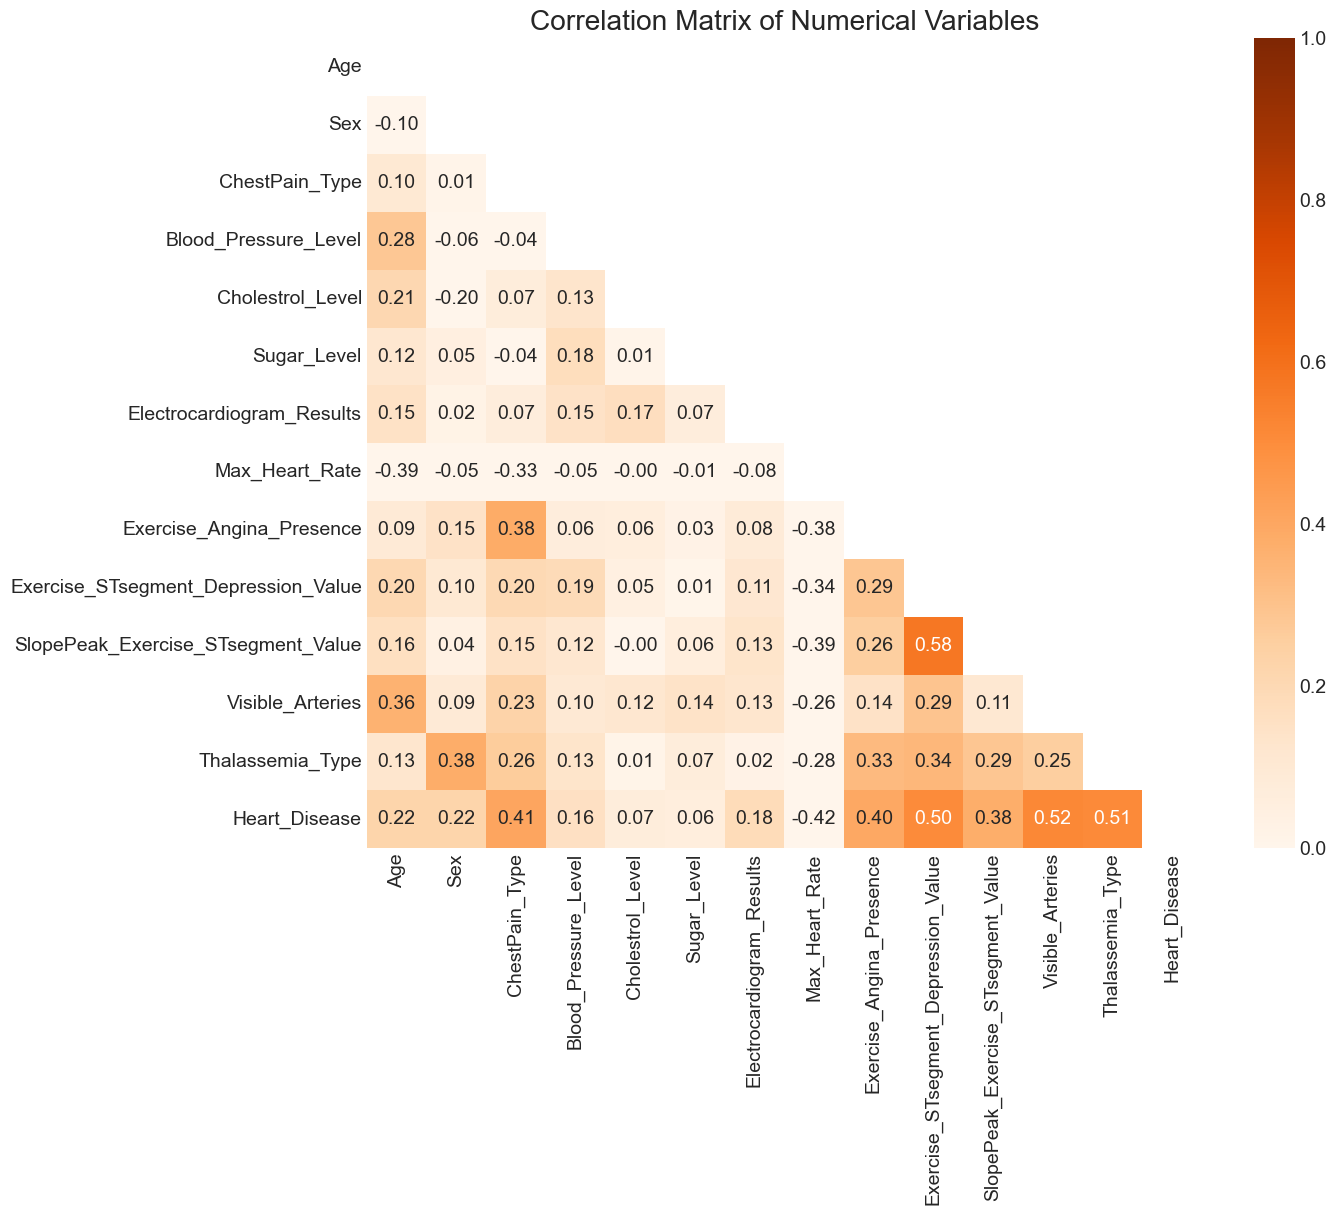

In [31]:
# Numerical Values Heatmap for Multivariate Analysis

correlation_matrix = df2.corr()

# Generate a mask for the upper triangle to avoid redundancy
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(12, 10))  
sns.heatmap(correlation_matrix, mask=mask, cmap='Oranges', vmin=0, vmax=1, annot=True, fmt=".2f", ax=ax)
ax.set_title('Correlation Matrix of Numerical Variables')
ax.grid(False)
plt.show()

# 

From the matrix, I found the insights below to be useful:

- Maximum Heart Rate Achieved has a negative correlation (-0.42) with heart disease, indicating that a higher maximum
heart rate achieved is associated with a lower likelihood of heart disease.

- Exercise ST segment Depression Value shows a moderate positive correlation (0.50) with heart disease, meaning that
higher ST segment depression is associated with a higher likelihood of heart disease.

- Slope Peak Exercise ST segment Value and Unblocked Coronary Arteries also show positive correlations (0.38 and
0.52, respectively) with heart disease.

- Unblocked Coronary Arteries have a strong positive correlation (0.36) with age, indicating that older participants tend
to have more unblocked coronary arteries. 

- Aging also seems to lead to higher cholestrol, bloos pressure, and sugar levels.

- Thalassemia Type shows strong positive correlations with Chest Pain Type (0.26) and Unblocked Coronary Arteries
(0.29), suggesting some association between these conditions.

- There is also a relation between chest pain and heart disease.


In [37]:
# Replace values in the 'Heart_Disease' column
df2['Heart_Disease'] = df2['Heart_Disease'].replace({0: 'No', 1: 'Yes', 2: 'Yes', 3: 'Yes', 4: 'Yes'})

# Create a new binary variable 'Heart_Disease_Binary'
df2['Heart_Disease_Binary'] = (df2['Heart_Disease'] != 'No').astype(int)

# Display the updated DataFrame
df2

,Age,Sex,ChestPain_Type,Blood_Pressure_Level,Cholestrol_Level,Sugar_Level,Electrocardiogram_Results,Max_Heart_Rate,Exercise_Angina_Presence,Exercise_STsegment_Depression_Value,SlopePeak_Exercise_STsegment_Value,Visible_Arteries,Thalassemia_Type,Heart_Disease,Heart_Disease_Binary
0,63,1,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,No,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,Yes,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,Yes,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,No,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,Yes,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,Yes,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,Yes,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,Yes,1


In [38]:
# Replace values in the 'Heart_Disease' column
df2['Sex'] = df2['Sex'].replace({0: 'Female', 1: 'Male'})

df2

,Age,Sex,ChestPain_Type,Blood_Pressure_Level,Cholestrol_Level,Sugar_Level,Electrocardiogram_Results,Max_Heart_Rate,Exercise_Angina_Presence,Exercise_STsegment_Depression_Value,SlopePeak_Exercise_STsegment_Value,Visible_Arteries,Thalassemia_Type,Heart_Disease,Heart_Disease_Binary
0,63,Male,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,No,0
1,67,Male,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,Yes,1
2,67,Male,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,Yes,1
3,37,Male,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,No,0
4,41,Female,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,Male,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,Yes,1
299,68,Male,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,Yes,1
300,57,Male,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,Yes,1
301,57,Female,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,Yes,1


[Text(0.5, 1.0, 'Distribution of Heart Disease Across Both Genders')]

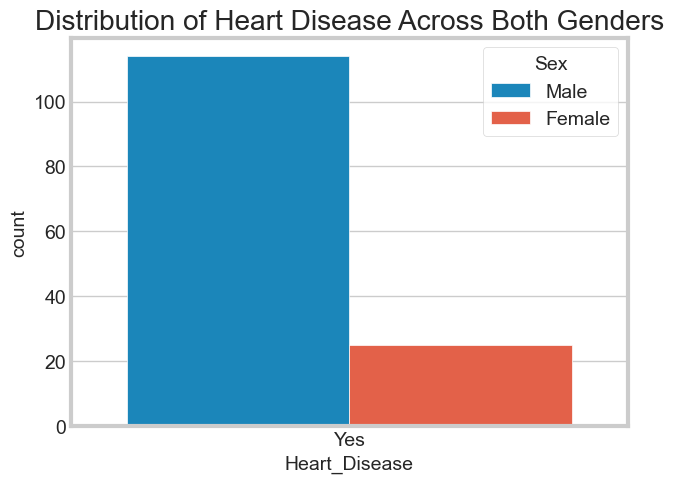

In [99]:
# Target variable analysis (Heart Disease):

# Filter the DataFrame to include only records where Heart disease cases
filtered_df = df2[df2['Heart_Disease'] == 'Yes']

sns.countplot(x='Heart_Disease', hue='Sex', data=filtered_df).set(title='Distribution of Heart Disease Across Both Genders')

# 
- Notice the significant gender disparity in the bar graph above. There are about 25 females with heart disease compared to almost 115 males. Most of those with heart disease are males suggesting that they are at a higher risk of developing it and may need to take extra care to manage their health health compared to their female counterparts.

<Axes: xlabel='Heart_Disease', ylabel='Age'>

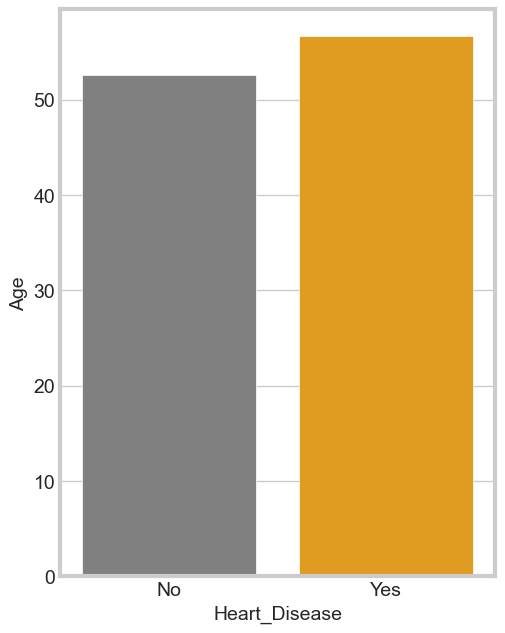

In [69]:
# How does BMI interact with different diseases and other factors: 

color_map = {
    "Yes": "orange",
    "No": "grey"
}

plt.figure(figsize=(5, 7))
sns.barplot(data=df2, x= 'Heart_Disease', y='Age', palette=color_map, ci=None)

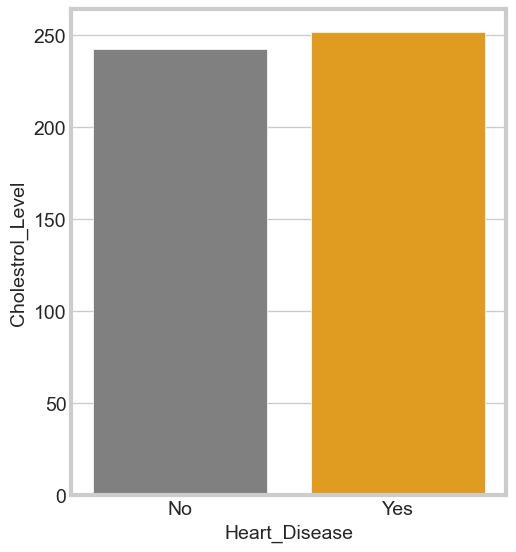

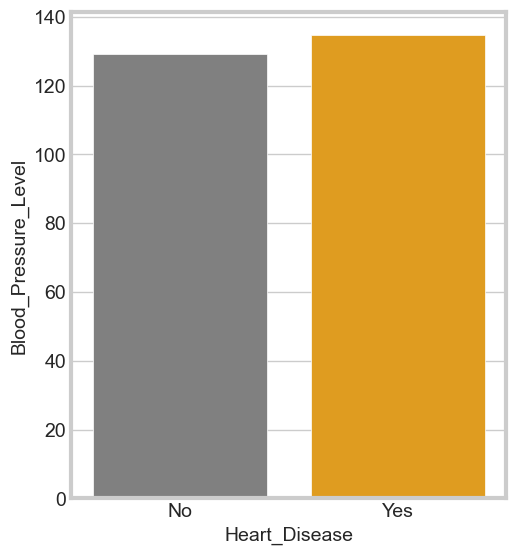

In [84]:
# How does BMI interact with different diseases and other factors: 

color_map = {
    "Yes": "orange",
    "No": "grey"
}

levels = ['Cholestrol_Level', 'Blood_Pressure_Level']

for variable in levels:
    plt.figure(figsize=(5, 6))
    sns.barplot(data=df2, x= 'Heart_Disease', y= variable, palette=color_map, ci=None)

# 

- The three bar graphs above show that individuals are at a higher risk of heart disease as they age because of also a higher risk of higher cholestrol and blood pressure levels.

Text(0.5, 1.0, 'Count Plot of Visible Arteries for Heart Disease Cases')

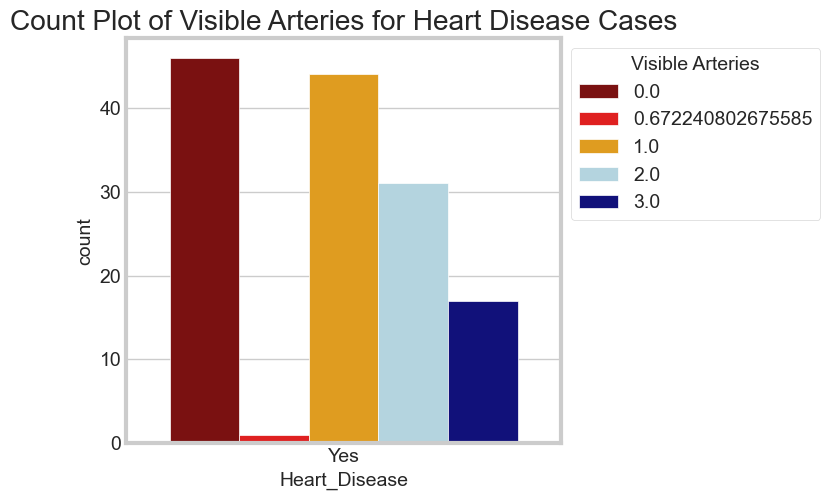

In [88]:
colors = {0: 'darkred', 0.672240802675585: 'red', 1: 'orange', 2: 'lightblue', 3: 'darkblue'}

# Filter the DataFrame to include only records where Heart disease cases
filtered_df = df2[df2['Heart_Disease'] == 'Yes']

# Create a count plot
plt.figure(figsize=(5, 5))
sns.countplot(data=filtered_df, x='Heart_Disease', hue='Visible_Arteries', palette=colors)
plt.legend(title='Visible Arteries', loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Count Plot of Visible Arteries for Heart Disease Cases')

## 
- Fluoroscopy is an imaging technique that uses X-rays to obtain real-time moving images of the interior of an object, in this case, the human heart.

- The Highest Reported Cases of Heart Disease Are Observed to be In Individuals Who Showed None or Only 1 Visible Artery During Fluoroscopy, Indicating Significant Coronary Blockage.

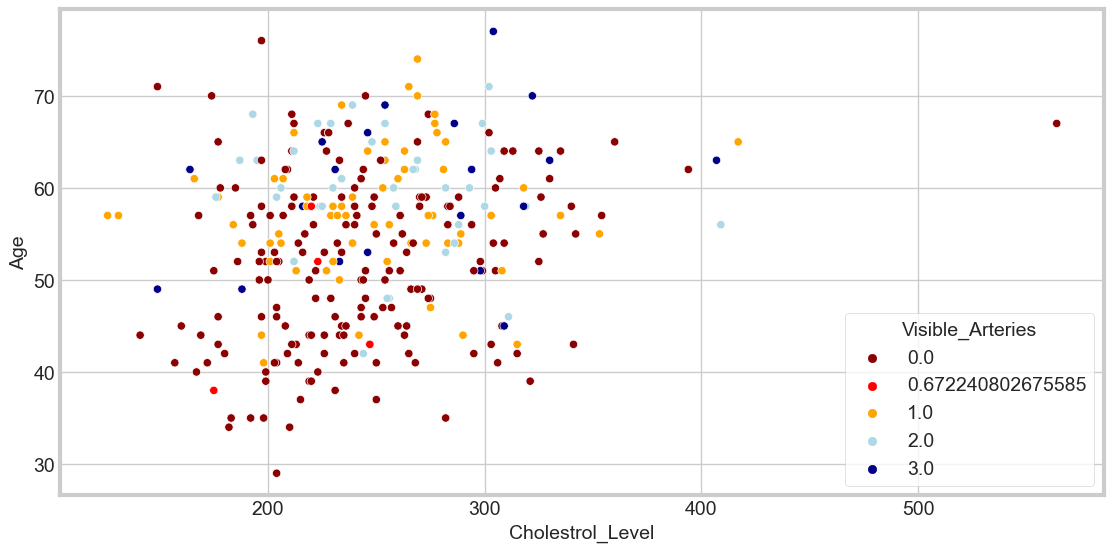

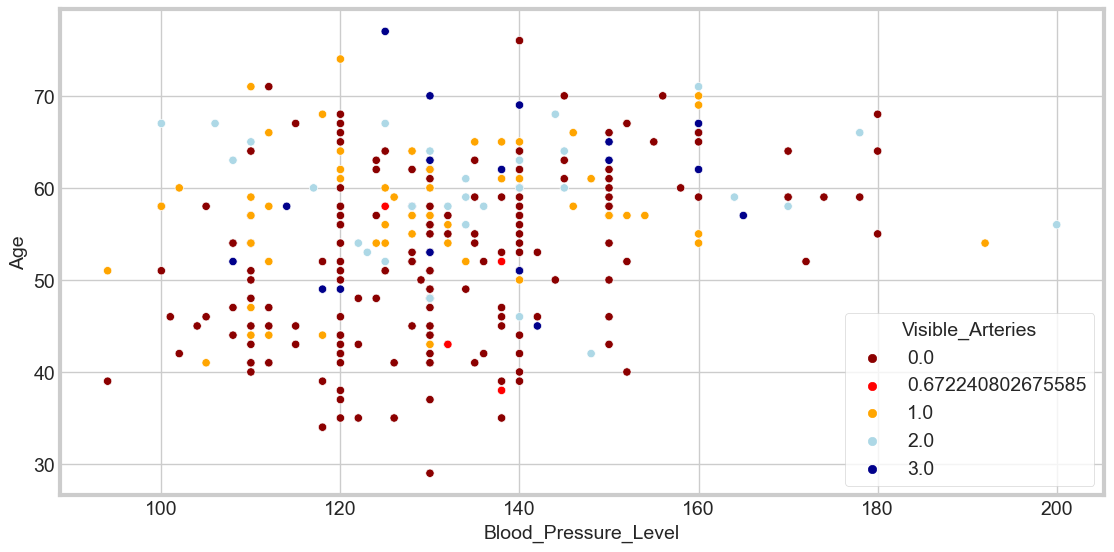

In [96]:
# Create scatterplots for age against blood pressure and cholestrol in relation to artery blocakge.

levels = ['Cholestrol_Level', 'Blood_Pressure_Level']

# Define custom colors for Visible_Arteries values

colors = {0: 'darkred', 0.672240802675585: 'red', 1: 'orange', 2: 'lightblue', 3: 'darkblue'}

sns.set_style("whitegrid")
for variable in levels:
    plt.figure(figsize=(12,6))
    sns.scatterplot(data=df2, x=variable, y='Age', hue="Visible_Arteries", palette=colors)

## 

- Older individuals not only have higher blood pressure on average but also a greater likelihood of artery blockage.

- Individuals are more likely to have cholestrol levels increase with age as well as artery blockage due to plaque build up.

Text(0.5, 1.0, 'Age vs. Maximum Heart Rate for Males')

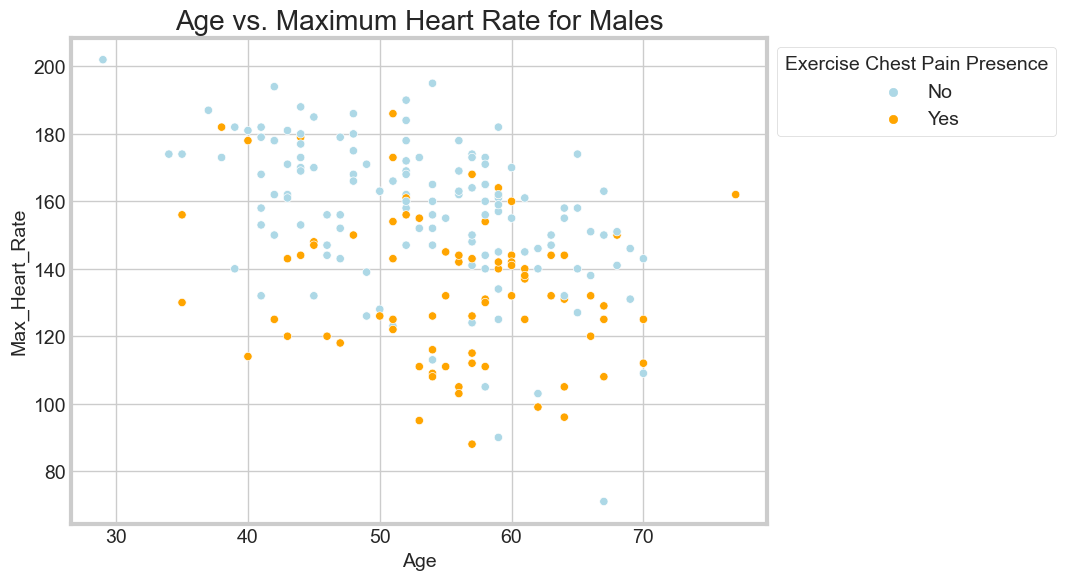

In [108]:
# Filter the DataFrame to include only Females
filtered_df = df2[df2['Sex'] == 'Male']

colors = {0: 'lightblue', 1: 'orange'}

sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
scatter = sns.scatterplot(data=filtered_df, x='Age', y='Max_Heart_Rate', hue="Exercise_Angina_Presence", palette=colors)

# Modify legend labels
legend_labels = {0: 'No', 1: 'Yes'}
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles, [legend_labels[int(float(label))] for label in labels], title='Exercise Chest Pain Presence', loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Age vs. Maximum Heart Rate for Males')

Text(0.5, 1.0, 'Age vs. Maximum Heart Rate for Females')

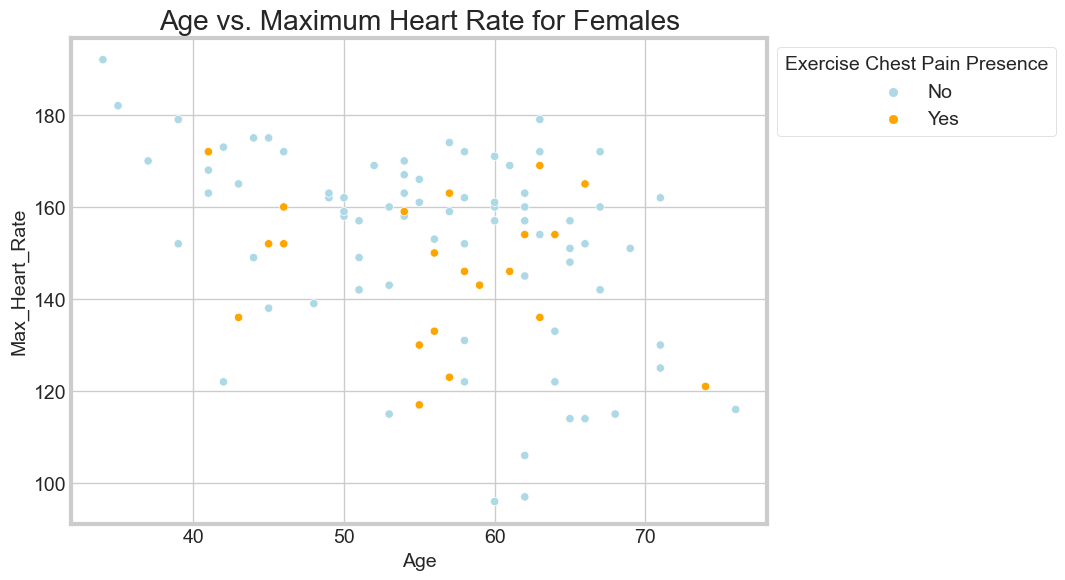

In [107]:
# Filter the DataFrame to include only Females
filtered_df = df2[df2['Sex'] == 'Female']

colors = {0: 'lightblue', 1: 'orange'}

sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
scatter = sns.scatterplot(data=filtered_df, x='Age', y='Max_Heart_Rate', hue="Exercise_Angina_Presence", palette=colors)

# Modify legend labels
legend_labels = {0: 'No', 1: 'Yes'}
handles, labels = scatter.get_legend_handles_labels()
scatter.legend(handles, [legend_labels[int(float(label))] for label in labels], title='Exercise Chest Pain Presence', loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Age vs. Maximum Heart Rate for Females')

# 

- Out of all heart disease cases, males are not only more likely to develop CVD but are also more likely to experience a decline in maximum heart rate with age. A number of cases also show the presence of exercise anginal pain suggesting that the heart is not receiving proper blood flow due to shortage in oxygen levels during exercise indicating artery blockage. 

In [109]:
# Replace values in the 'Heart_Disease' column
df2['Chest_Pain_Type'] = df2['ChestPain_Type'].replace({1: 'Typical Anginal Pain', 2: 'Atypical Anginal Pain',
                                                       3: 'Non-anginal Pain', 4: 'Asymptomatic'})

df2

,Age,Sex,ChestPain_Type,Blood_Pressure_Level,Cholestrol_Level,Sugar_Level,Electrocardiogram_Results,Max_Heart_Rate,Exercise_Angina_Presence,Exercise_STsegment_Depression_Value,SlopePeak_Exercise_STsegment_Value,Visible_Arteries,Thalassemia_Type,Heart_Disease,Heart_Disease_Binary,Chest_Pain_Type
0,63,Male,1,145,233,1,2,150,0,2.3,3,0.000000,6.0,No,0,Typical Anginal Pain
1,67,Male,4,160,286,0,2,108,1,1.5,2,3.000000,3.0,Yes,1,Asymptomatic
2,67,Male,4,120,229,0,2,129,1,2.6,2,2.000000,7.0,Yes,1,Asymptomatic
3,37,Male,3,130,250,0,0,187,0,3.5,3,0.000000,3.0,No,0,Non-anginal Pain
4,41,Female,2,130,204,0,2,172,0,1.4,1,0.000000,3.0,No,0,Atypical Anginal Pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,Male,1,110,264,0,0,132,0,1.2,2,0.000000,7.0,Yes,1,Typical Anginal Pain
299,68,Male,4,144,193,1,0,141,0,3.4,2,2.000000,7.0,Yes,1,Asymptomatic
300,57,Male,4,130,131,0,0,115,1,1.2,2,1.000000,7.0,Yes,1,Asymptomatic
301,57,Female,2,130,236,0,2,174,0,0.0,2,1.000000,3.0,Yes,1,Atypical Anginal Pain


Text(0.5, 1.0, 'Distribution of Chest Pain Types for Individuals with Heart Disease')

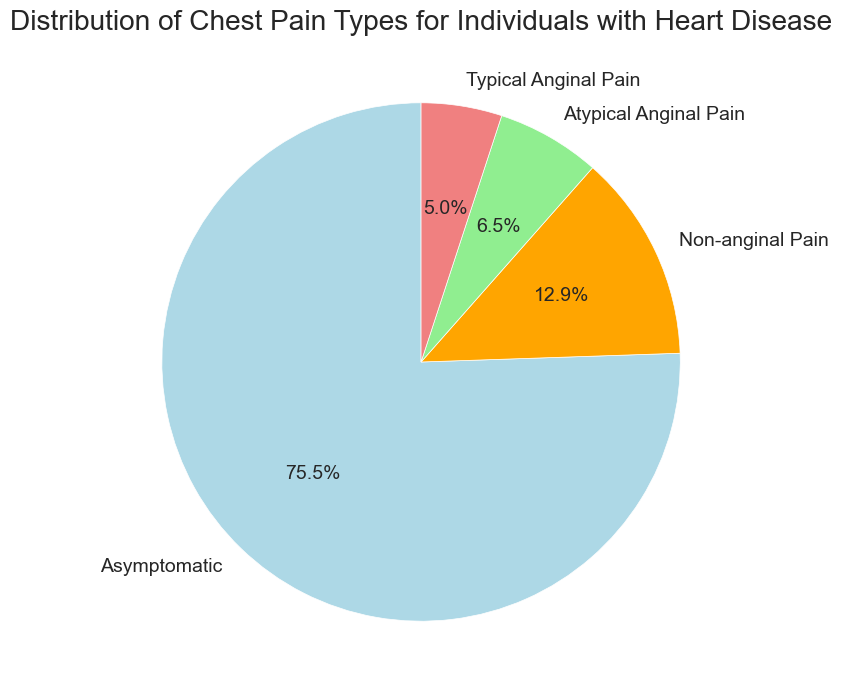

In [117]:
# Filter the DataFrame to include only cases where Heart_Disease is 'Yes'
filtered_df = df2[df2['Heart_Disease'] == 'Yes']

# Count the occurrences of each chest pain type
chest_pain_counts = filtered_df['Chest_Pain_Type'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(chest_pain_counts, labels=chest_pain_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange', 'lightgreen', 'lightcoral'])
plt.title('Distribution of Chest Pain Types for Individuals with Heart Disease')

# 

- About 76% of heart disease cases report having experienced asymptomatic chest pain, meaning experiencing no clear symptoms of having any heart-related issues. This indicates the importance of regular checkups.

## Final Takeaways & Recommendations based on Analysis:

While certain risk factors for heart disease lie beyond our control, such as advancing age, male gender, and inherited
genetic predispositions, it is crucial to focus on what we can influence. Unmodifiable elements like family history and
potentially overlooked genetic markers extracted from data analysis highlight the significance of vigilance in heart health
management.

There are actionable insights deduced from the data which are key to mitigating heart disease risks. These include:

- Stop Smoking: 

Smoking is a clear indicator of heart disease risk. If you smoke, seek help to quit. Avoid exposure to
secondhand smoke as well.

-------------------------------------------------------------------------------------------------------------------------------

- Limit Alcohol Consumption:

Limit alcohol to moderate levels.

-------------------------------------------------------------------------------------------------------------------------------

- Checkup Regularly:

Regular monitoring of blood pressure, cholesterol levels, and other risk factors in case of pain or other symptoms absence can help in early detection and management of heart disease.

-------------------------------------------------------------------------------------------------------------------------------

- Manage Blood Pressure:

Regular monitoring and a balanced diet aid in maintaining optimal blood pressure levels.

-------------------------------------------------------------------------------------------------------------------------------

- Check Cholesterol Level: 

Routine screenings and dietary adjustments help keep cholesterol in check.

-------------------------------------------------------------------------------------------------------------------------------

- Increase Physical Activity: 

Individuals as they age, particularly males, are Encouraged to maintain regular physical activity, which can include anything from brisk walking, cycling, and swimming, to more structured exercises. Regular exercise not only combats obesity but also aids in maintaining a healthy Body Mass Index (BMI), contributing to overall wellness.

-------------------------------------------------------------------------------------------------------------------------------

- Maintain Healthy Body Weight: 

This involves balancing the calories consumed with calories burned through physical activities. Avoid obesity and overweight, which are significant risk factors for heart disease.

-------------------------------------------------------------------------------------------------------------------------------

- Balance Diet: 

Opting for a diet rich in nutrients and low in fried and fatty foods benefits heart health and reduces sugar consumption to decrease the risk of diabetes and obesity, both of which are linked to heart disease.

## By integrating these practices into daily life, we can significantly improve our heart health and avoid many problems.